In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/2022dataset/subset_5k.csv'

Mounted at /content/drive


In [ ]:
data_update = pd.read_csv(file_path)
data_update

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.68,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.73,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,1.73,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,1.68,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.60,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,North Dakota,Male,Good,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.83,104.33,31.19,Yes,Yes,Yes,Yes,"Yes, received Tdap",No,Yes
4996,New York,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.60,63.50,24.80,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
4997,Washington,Male,Good,30.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,7.0,1 to 5,No,...,1.88,157.85,44.68,Yes,No,No,No,"Yes, received Tdap",No,No
4998,New York,Female,Very good,3.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,49.90,17.23,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes


In [ ]:
data_update.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [ ]:
data_update.duplicated().sum()

0

In [ ]:
data_copy1 = data_update.copy()
data_copy2 = data_update.copy()
data_copy3 = data_update.copy()

In [ ]:
data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      5000 non-null   object 
 1   Sex                        5000 non-null   object 
 2   GeneralHealth              5000 non-null   object 
 3   PhysicalHealthDays         5000 non-null   float64
 4   MentalHealthDays           5000 non-null   float64
 5   LastCheckupTime            5000 non-null   object 
 6   PhysicalActivities         5000 non-null   object 
 7   SleepHours                 5000 non-null   float64
 8   RemovedTeeth               5000 non-null   object 
 9   HadHeartAttack             5000 non-null   object 
 10  HadAngina                  5000 non-null   object 
 11  HadStroke                  5000 non-null   object 
 12  HadAsthma                  5000 non-null   object 
 13  HadSkinCancer              5000 non-null   objec

In [ ]:
data_copy1.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,4.174000,4.314000,7.01220,1.701384,83.526380,28.767042
std,8.443411,8.295346,1.38175,0.106637,21.417591,6.605894
min,0.000000,0.000000,1.00000,0.970000,35.830000,15.060000
25%,0.000000,0.000000,6.00000,1.630000,68.040000,24.280000
50%,0.000000,0.000000,7.00000,1.700000,81.190000,27.460000
75%,3.000000,4.000000,8.00000,1.780000,95.250000,32.080000
max,30.000000,30.000000,22.00000,2.290000,249.480000,82.310000


In [ ]:
data_copy1.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
numerical_cols = data_copy1.select_dtypes(include=['float64','number']).columns
numerical_data = data_copy1[numerical_cols]
numerical_data

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,1.68,113.40,40.35
1,2.0,5.0,8.0,1.73,104.33,34.97
2,7.0,10.0,6.0,1.73,104.33,34.97
3,20.0,10.0,8.0,1.68,127.01,45.19
4,0.0,0.0,7.0,1.60,49.90,19.49
...,...,...,...,...,...,...
4995,0.0,2.0,6.0,1.83,104.33,31.19
4996,0.0,0.0,7.0,1.60,63.50,24.80
4997,30.0,0.0,7.0,1.88,157.85,44.68
4998,3.0,2.0,7.0,1.70,49.90,17.23


In [ ]:
categorical_cols = data_copy1.select_dtypes(include=['object','category']).columns
for col in categorical_cols:
    print(f"Levels in '{col}': {data_update[col].unique()}")
    print(f"Number of levels: {data_update[col].nunique()}")
    print('-' * 40)

Levels in 'State': ['Texas' 'Wisconsin' 'Idaho' 'Iowa' 'South Dakota' 'Maryland' 'Maine'
 'Ohio' 'Illinois' 'Colorado' 'Kentucky' 'Delaware' 'California' 'Utah'
 'Indiana' 'Michigan' 'New Hampshire' 'Washington' 'Arkansas' 'Florida'
 'New Mexico' 'Louisiana' 'Georgia' 'Oregon' 'New York' 'Nebraska'
 'Mississippi' 'Massachusetts' 'Tennessee' 'Virginia' 'Kansas'
 'Puerto Rico' 'Minnesota' 'South Carolina' 'Hawaii' 'North Carolina'
 'Nevada' 'Montana' 'North Dakota' 'Wyoming' 'Vermont'
 'District of Columbia' 'West Virginia' 'New Jersey' 'Guam' 'Rhode Island'
 'Alabama' 'Connecticut' 'Missouri' 'Oklahoma' 'Arizona' 'Virgin Islands'
 'Pennsylvania' 'Alaska']
Number of levels: 54
----------------------------------------
Levels in 'Sex': ['Female' 'Male']
Number of levels: 2
----------------------------------------
Levels in 'GeneralHealth': ['Good' 'Poor' 'Excellent' 'Very good' 'Fair']
Number of levels: 5
----------------------------------------
Levels in 'LastCheckupTime': ['Within past y

In [ ]:
data_copy1['HeartConditionBinary'] = ((data_copy1['HadHeartAttack'] == 'Yes') | (data_copy1['HadAngina'] == 'Yes')).astype(int)
data_copy1

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,North Dakota,Male,Good,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,104.33,31.19,Yes,Yes,Yes,Yes,"Yes, received Tdap",No,Yes,0
4996,New York,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,63.50,24.80,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,0
4997,Washington,Male,Good,30.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,7.0,1 to 5,No,...,157.85,44.68,Yes,No,No,No,"Yes, received Tdap",No,No,0
4998,New York,Female,Very good,3.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,17.23,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes,0


In [ ]:
data_copy1 = data_copy1.drop(['HadHeartAttack','HadAngina'],axis=1)

In [ ]:
class_counts = data_copy1['HeartConditionBinary'].value_counts()
class_counts

,count
HeartConditionBinary,
0,4555
1,445


In [ ]:
# Performing Chi-Square test and storing results in a DataFrame for better observation
chi_square_results = []

# Loop through each categorical column and perform the test
for col in categorical_cols:
    if col in data_copy1.columns and col != 'HadHeartAttack' and col != 'HadAngina':
        # Create the contingency table
        contingency_table = pd.crosstab(data_copy1[col], data_copy1['HeartConditionBinary'])

        # Perform the Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Determine significance
        significant = 'Yes' if p < 0.05 else 'No'

        # Store results
        chi_square_results.append({"Variable": col, "P-Value": p, "Significant": significant})

# Convert the results to a DataFrame and sort by p-value
chi_square_df = pd.DataFrame(chi_square_results).sort_values(by='P-Value')

# Display the results
print("\nChi-Square Test Results:")
print(chi_square_df)


Chi-Square Test Results:
                     Variable       P-Value Significant
24                AgeCategory  3.559301e-60         Yes
2               GeneralHealth  4.162972e-55         Yes
6                   HadStroke  5.707846e-42         Yes
22                  ChestScan  1.932175e-41         Yes
28              PneumoVaxEver  6.406665e-41         Yes
11           HadKidneyDisease  1.833680e-34         Yes
5                RemovedTeeth  3.559742e-34         Yes
12               HadArthritis  2.136244e-33         Yes
13                HadDiabetes  2.720619e-32         Yes
17          DifficultyWalking  4.380476e-32         Yes
9                     HadCOPD  2.918933e-24         Yes
20               SmokerStatus  6.273922e-21         Yes
14        DeafOrHardOfHearing  1.140534e-18         Yes
19          DifficultyErrands  5.828913e-15         Yes
8               HadSkinCancer  1.524354e-12         Yes
18  DifficultyDressingBathing  1.507716e-10         Yes
1                     

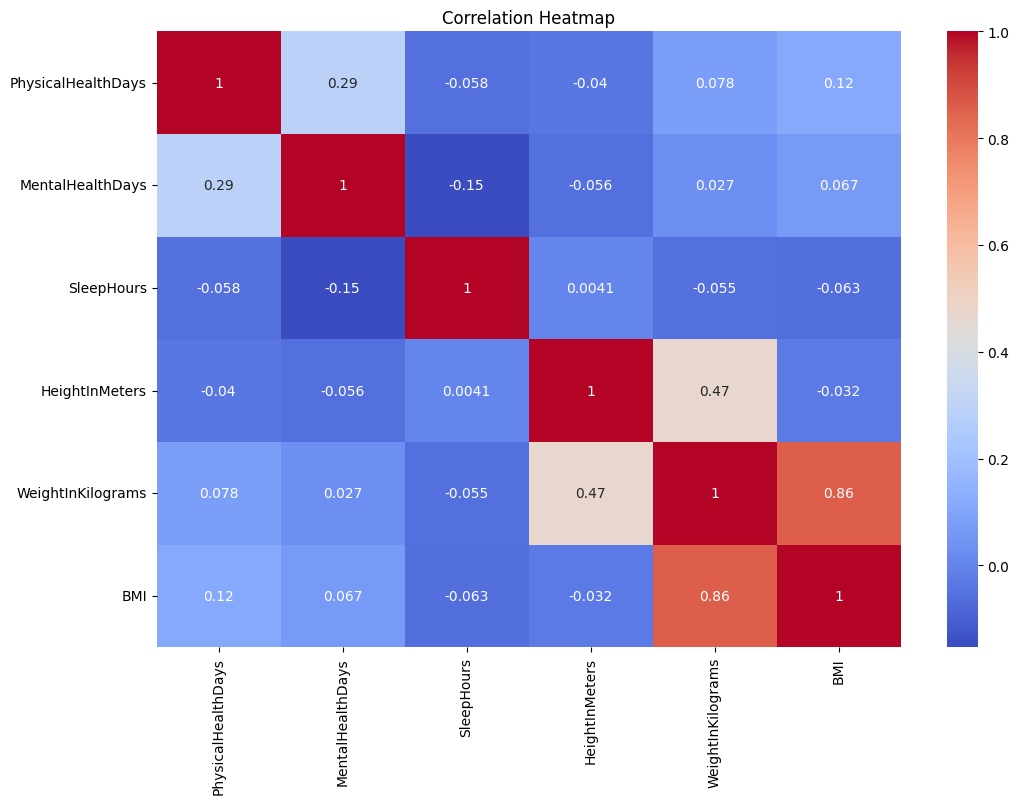

In [ ]:
# Correlation matrix for numerical columns
correlation_matrix = data_copy1[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
nominal_features = ['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos','RemovedTeeth','SmokerStatus','ECigaretteUsage','HadDiabetes']
binary_features = [
     'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'PhysicalActivities', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan'
]
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'AgeCategory']

data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})


<ipython-input-15-90263386828c>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})


In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(data_copy1[nominal_features]),
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=data_copy1.index  # Align indices with the original DataFrame
)

binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)


ordinal_mappings = {
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'LastCheckupTime': [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ],
    'AgeCategory':[
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59','Age 60 to 64', 'Age 65 to 69'
         ,'Age 70 to 74','Age 75 to 79','Age 80 or older'
    ]
}

ordinal_encoded = data_copy1[ordinal_features].replace({
    col: {val: i for i, val in enumerate(vals)} for col, vals in ordinal_mappings.items()
})

<ipython-input-16-2b01ca78c0a6>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-16-2b01ca78c0a6>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordinal_encoded = data_copy1[ordinal_features].replace({


In [ ]:
processed_data = pd.concat([nominal_encoded, binary_encoded, ordinal_encoded,numerical_data], axis=1)
processed_data['HeartConditionBinary'] = data_copy1['HeartConditionBinary'].values

In [ ]:
class_counts1 = processed_data['HeartConditionBinary'].value_counts()
class_counts1

,count
HeartConditionBinary,
0,4555
1,445


In [ ]:
processed_data

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,6,0.0,0.0,8.0,1.68,113.40,40.35,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,2.0,5.0,8.0,1.73,104.33,34.97,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,7.0,10.0,6.0,1.73,104.33,34.97,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,8,20.0,10.0,8.0,1.68,127.01,45.19,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,49.90,19.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,2,0.0,2.0,6.0,1.83,104.33,31.19,0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,63.50,24.80,0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,6,30.0,0.0,7.0,1.88,157.85,44.68,0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,1,3.0,2.0,7.0,1.70,49.90,17.23,0


In [ ]:
# Check if indices match between the original target and processed data
print(data_copy1['HeartConditionBinary'].index.equals(processed_data.index))  # Should return True

# Ensure no missing values in the target column
print(processed_data['HeartConditionBinary'].isnull().sum())

True
0


In [ ]:
processed_data.columns

Index(['State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District of Columbia', 'State_Florida',
       ...
       'GeneralHealth', 'LastCheckupTime', 'AgeCategory', 'PhysicalHealthDays',
       'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms',
       'BMI', 'HeartConditionBinary'],
      dtype='object', length=112)

In [ ]:
from sklearn.ensemble import IsolationForest

# Initializing and training the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(processed_data)

# Adding the 'Outlier' column to the DataFrame
processed_data['Outlier'] = outliers

# Calculating the percentage of outliers detected
total_samples = len(processed_data)
outlier_count = (processed_data['Outlier'] == -1).sum()
outlier_percentage = (outlier_count / total_samples) * 100

# Display the percentage of outliers detected
print(f"Total Samples: {total_samples}")
print(f"Number of Outliers Detected: {outlier_count}")
print(f"Percentage of Outliers Detected: {outlier_percentage:.2f}%")

Total Samples: 5000
Number of Outliers Detected: 250
Percentage of Outliers Detected: 5.00%


In [ ]:
X = processed_data.drop(columns=['HeartConditionBinary'])
y = processed_data['HeartConditionBinary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)# Train a Random Forest model


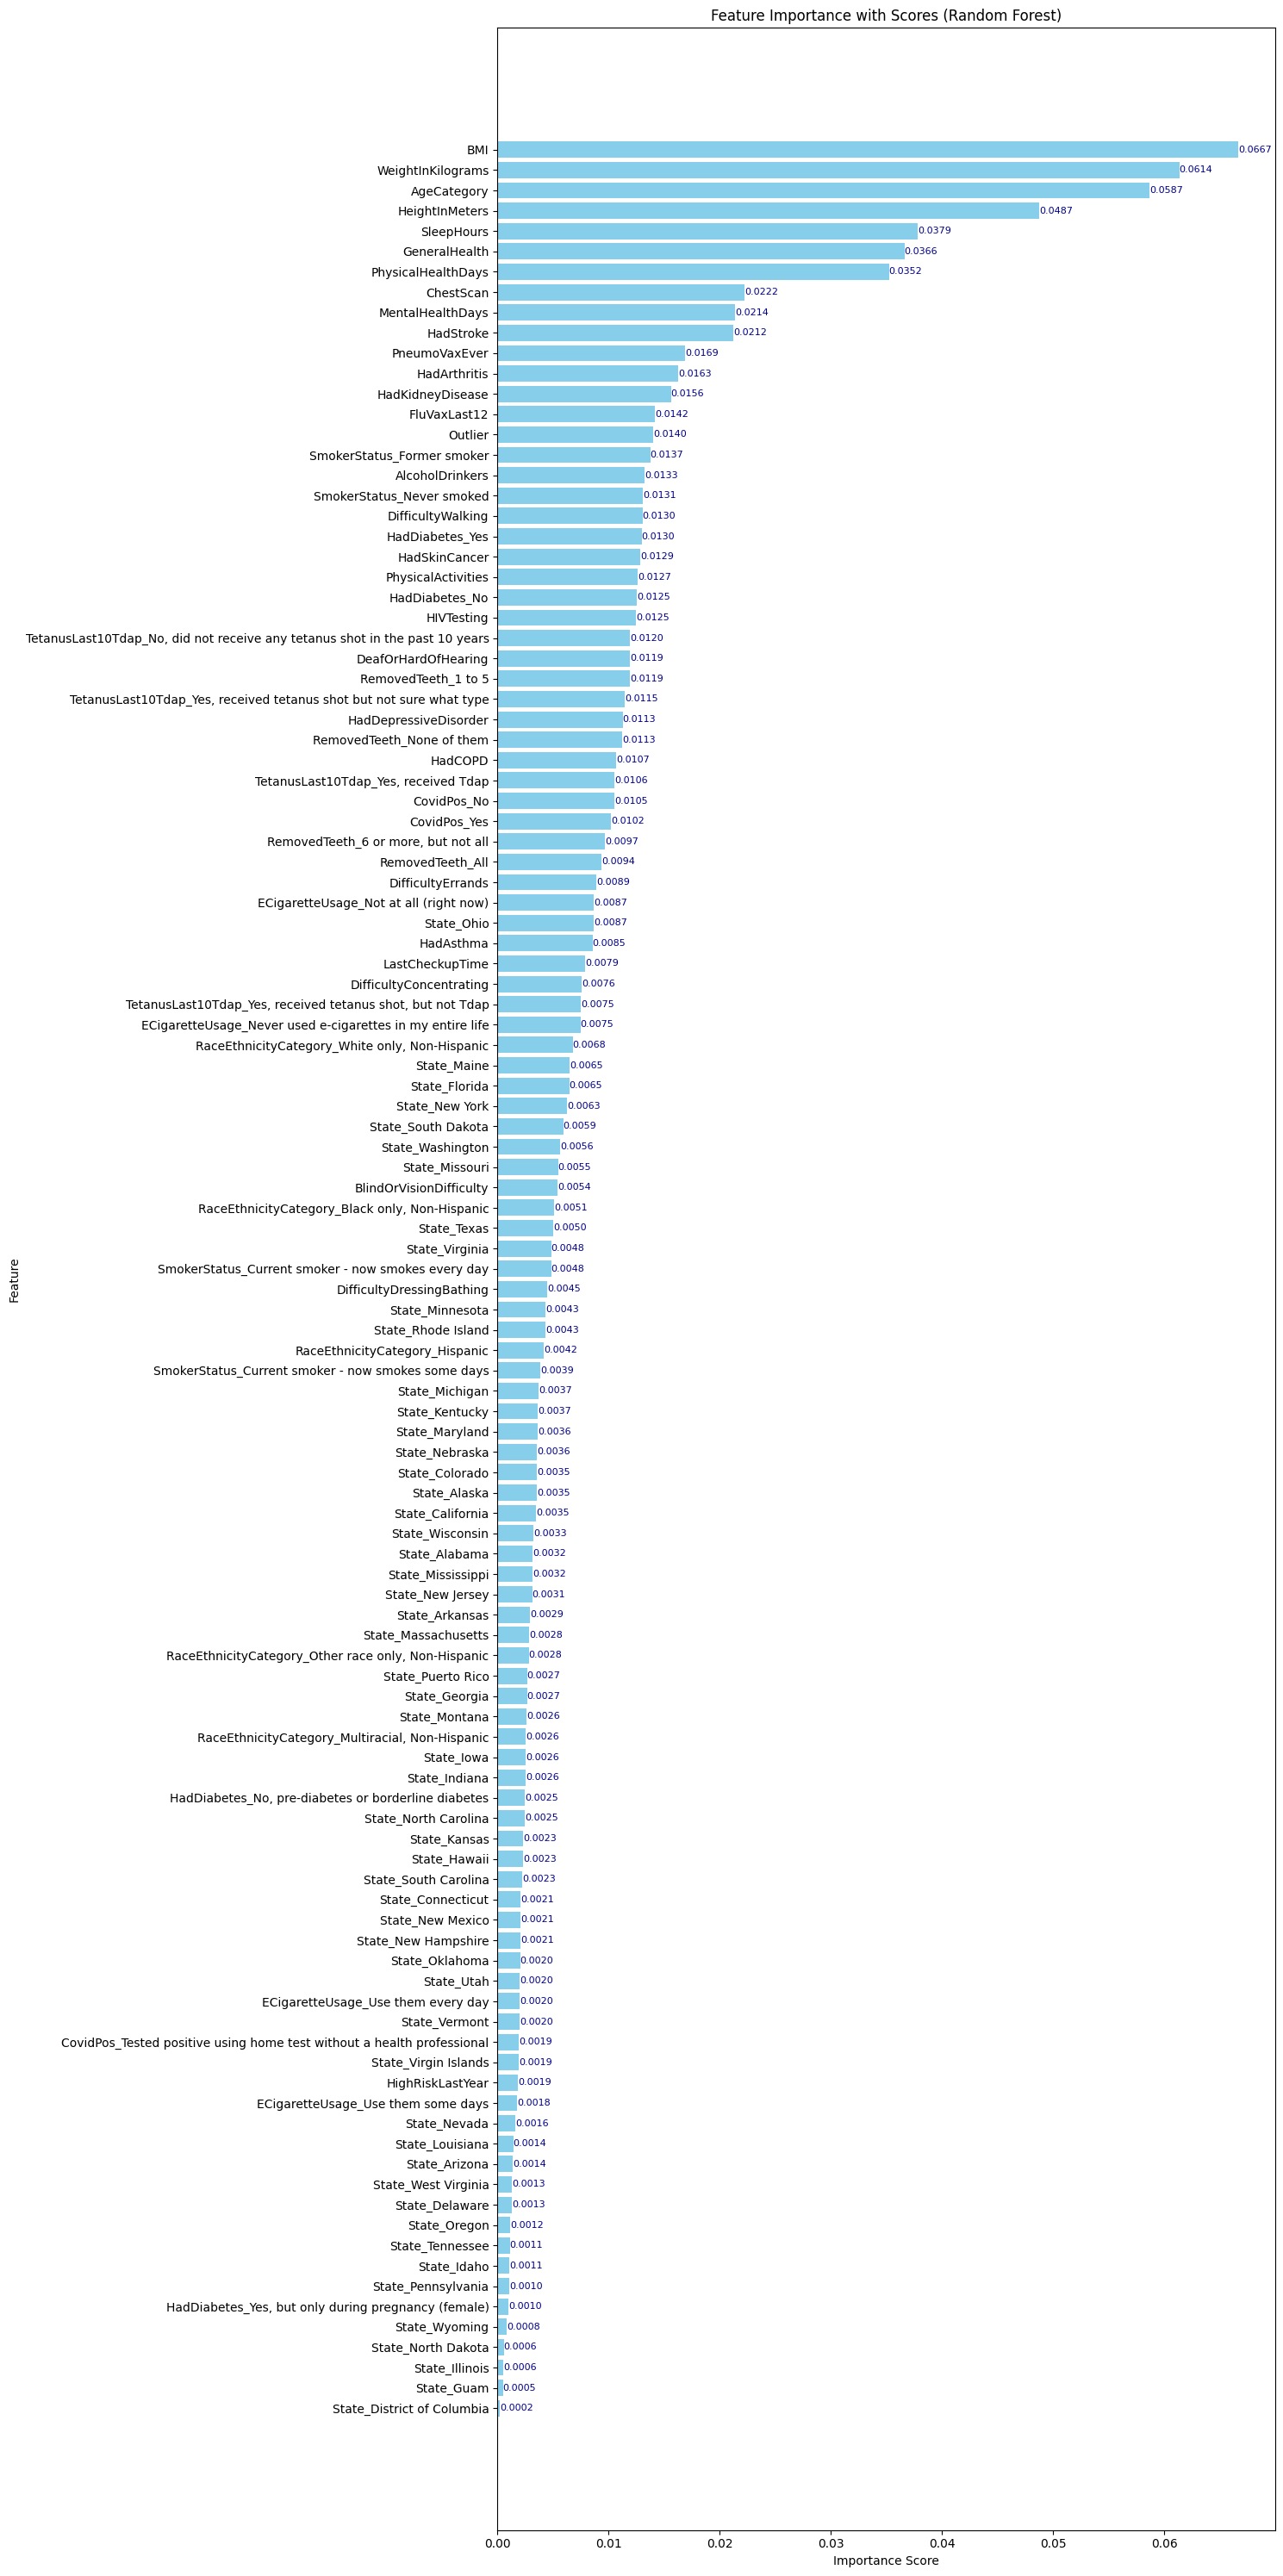

In [ ]:
'''X = processed_data.drop(columns=['HeartConditionBinary'])
y = processed_data['HeartConditionBinary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)# Train a Random Forest model'''
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

# Get feature importance
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})

# Sort by feature importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 30))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='skyblue')

# Annotate the bar chart with feature scores
for i, (importance, feature) in enumerate(zip(feature_importance_rf['Importance'], feature_importance_rf['Feature'])):
    plt.text(importance, i, f'{importance:.4f}', va='center', ha='left', fontsize=8, color='darkblue')

# Formatting
plt.gca().invert_yaxis()
plt.title('Feature Importance with Scores (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot as an image
plt.savefig('feature_importance_with_scores.png', dpi=300)
plt.show()

# ML Algorithms

In [ ]:
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [ ]:
X_train.columns = X_train.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)

In [ ]:
X_train_scaled = X_train
X_test_scaled = X_test

In [ ]:
X_train_scaled

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District_of_Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Outlier
2733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,4,-0.495929,0.682591,-0.737981,-1.229463,0.110960,0.885341,1
447,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,10,-0.257888,-0.519259,0.002406,1.383586,-0.119742,-0.782519,1
970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,2,3.074691,-0.519259,-2.218756,0.450354,0.320858,0.103111,1
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,3,11,3.074691,-0.519259,0.742794,-0.949493,0.110960,0.722002,1
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,10,-0.376909,0.081666,-0.737981,0.263708,-0.098475,-0.220571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,1,3,-0.495929,0.201851,-0.737981,0.450354,0.950088,0.766958,1
3441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,10,-0.495929,-0.519259,-0.737981,-0.949493,-0.937602,-0.605692,1
1344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,10,-0.495929,-0.519259,0.742794,1.196940,0.530293,-0.054235,1
4623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,8,-0.376909,-0.519259,0.002406,-0.949493,-0.622756,-0.207084,1


In [ ]:
'''scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)'''

In [ ]:
'''X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)'''

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10),
    "LightGBM": LGBMClassifier(random_state=10),
    "Naive Bayes": GaussianNB()
}

Training Logistic Regression...

Logistic Regression - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       915
           1       0.36      0.09      0.15        85

    accuracy                           0.91      1000
   macro avg       0.64      0.54      0.55      1000
weighted avg       0.87      0.91      0.88      1000


Logistic Regression - Confusion Matrix (Test Set):
[[901  14]
 [ 77   8]]
Training Random Forest...

Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       915
           1       0.00      0.00      0.00        85

    accuracy                           0.91      1000
   macro avg       0.46      0.50      0.48      1000
weighted avg       0.84      0.91      0.87      1000


Random Forest - Confusion Matrix (Test Set):
[[912   3]
 [ 85   0]]
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:16:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       915
           1       0.30      0.09      0.14        85

    accuracy                           0.90      1000
   macro avg       0.61      0.54      0.55      1000
weighted avg       0.87      0.90      0.88      1000


XGBoost - Confusion Matrix (Test Set):
[[896  19]
 [ 77   8]]
Training LightGBM...
[LightGBM] [Info] Number of positive: 360, number of negative: 3640
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090000 -> initscore=-2.313635
[LightGBM] [Info] Start training from score 

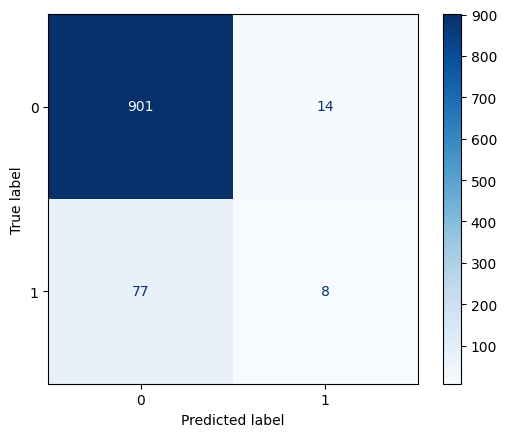

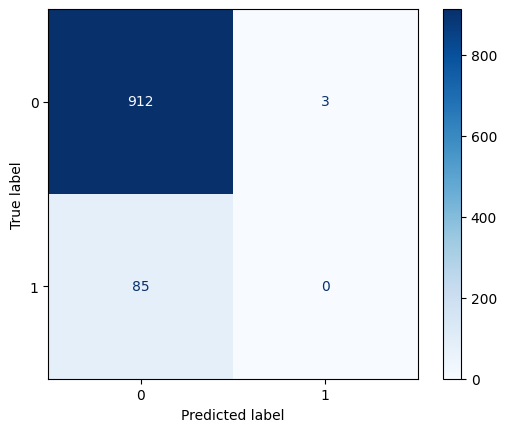

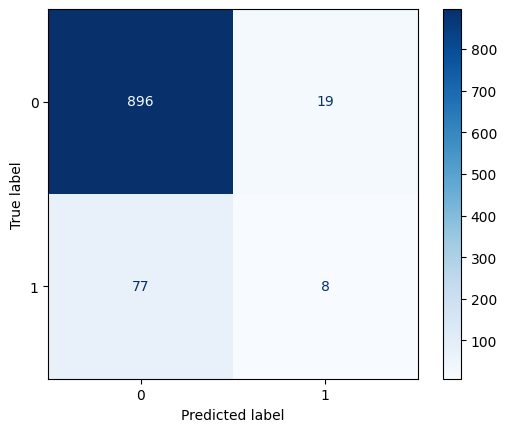

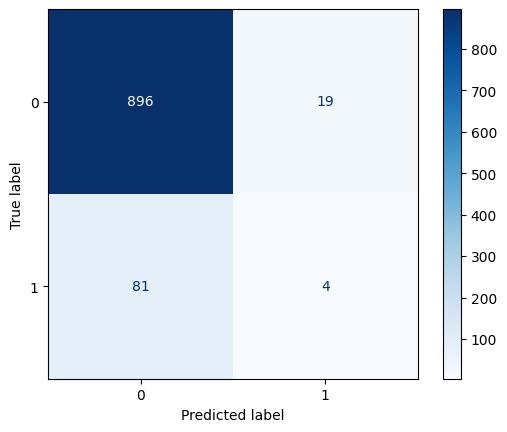

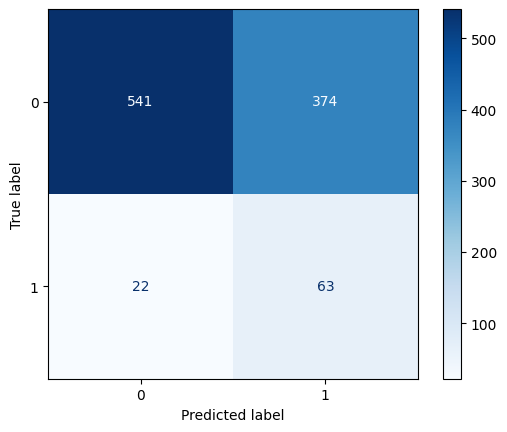

<Figure size 1000x600 with 0 Axes>

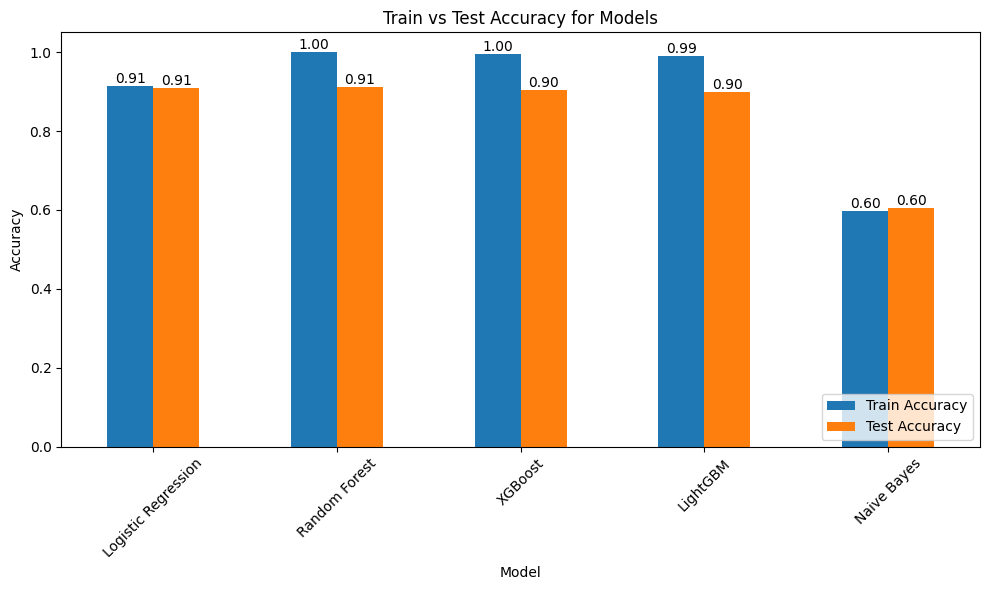

In [ ]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import pandas as pd
import matplotlib.pyplot as plt

results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC for binary classification
    auc_roc = None
    if len(set(y_test)) == 2:  # Check if binary classification
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print classification report
    print(f"\n{name} - Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix (Test Set):")
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#CSL

In [ ]:
# Imbalance Ratio(IR) = Nmj/Nmin

Nmaj = class_counts[0]  # Count for class '0'
Nmin = class_counts[1]  # Count for class '1'

# Compute Imbalance Ratio (IR)
IR = Nmaj / Nmin

print(f"Majority Class (Nmaj): {Nmaj}")
print(f"Minority Class (Nmin): {Nmin}")
print(f"Imbalance Ratio (IR): {IR:.2f}")

Majority Class (Nmaj): 4555
Minority Class (Nmin): 445
Imbalance Ratio (IR): 10.24



Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       915
           1       0.25      0.84      0.39        85

    accuracy                           0.78      1000
   macro avg       0.62      0.80      0.63      1000
weighted avg       0.92      0.78      0.82      1000


Logistic Regression - Confusion Matrix:


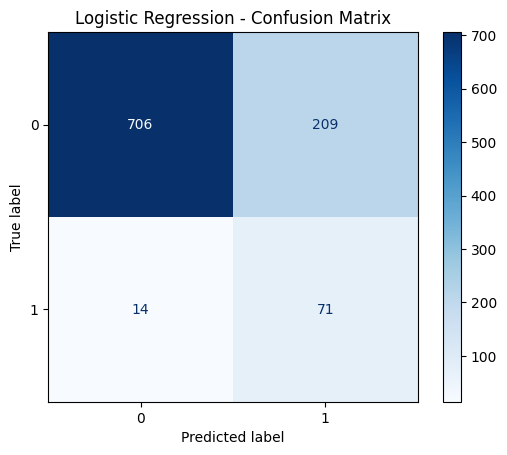


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       915
           1       0.26      0.36      0.31        85

    accuracy                           0.86      1000
   macro avg       0.60      0.64      0.61      1000
weighted avg       0.88      0.86      0.87      1000


Random Forest - Confusion Matrix:


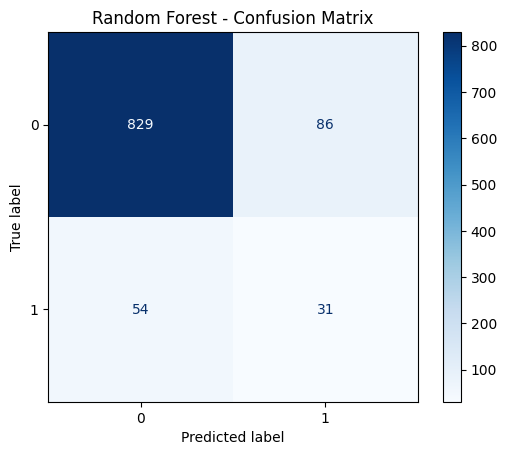


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:16:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       915
           1       0.24      0.24      0.24        85

    accuracy                           0.87      1000
   macro avg       0.58      0.58      0.58      1000
weighted avg       0.87      0.87      0.87      1000


XGBoost - Confusion Matrix:


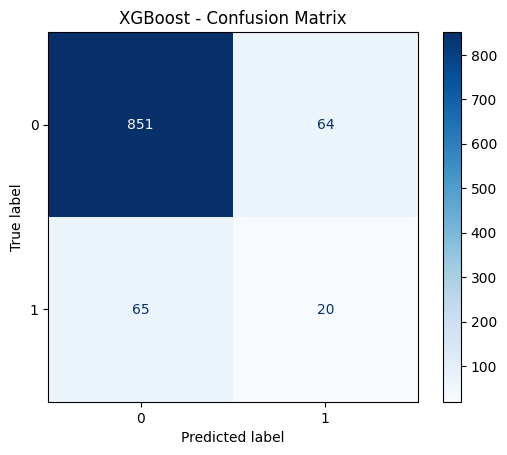


Training LightGBM...
[LightGBM] [Info] Number of positive: 360, number of negative: 3640
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090000 -> initscore=-2.313635
[LightGBM] [Info] Start training from score -2.313635

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       915
           1       0.29      0.35      0.32        85

    accuracy                           0.87      1000
   macro avg       0.61      0.64      0.62      1000
weighted avg       0.88      0.87      0.88      1000


LightGBM - Confusion Matrix:


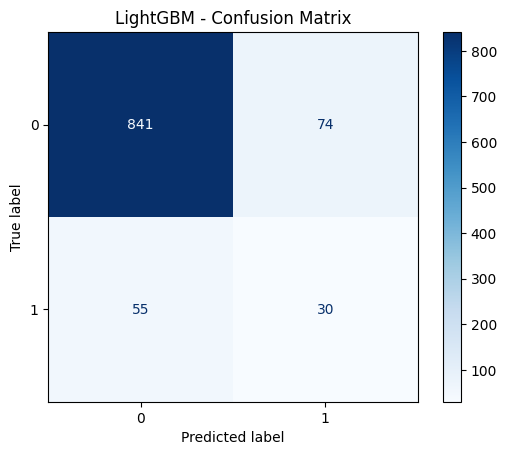


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.54      0.70       915
           1       0.13      0.76      0.23        85

    accuracy                           0.56      1000
   macro avg       0.55      0.65      0.46      1000
weighted avg       0.89      0.56      0.66      1000


Naive Bayes - Confusion Matrix:


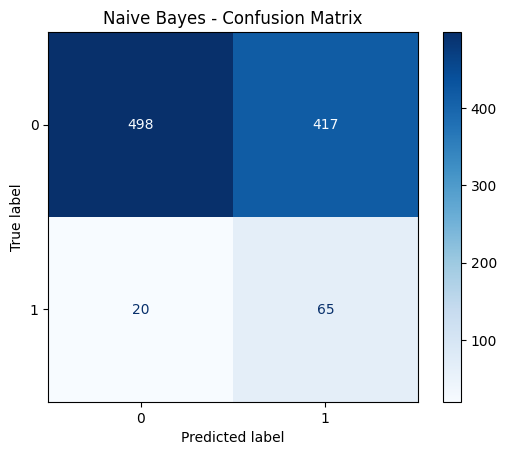


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression         0.76975          0.777  0.854079   
1        Random Forest         0.94150          0.860  0.831398   
2              XGBoost         0.99725          0.871  0.759254   
3             LightGBM         0.97125          0.871  0.829302   
4          Naive Bayes         0.55350          0.563  0.714092   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.863609            0.389041          0.771585          0.835294  
1            0.922136            0.306931          0.906011          0.364706  
2            0.929547            0.236686          0.930055          0.235294  
3            0.928769            0.317460          0.919126          0.352941  
4            0.695045            0.229277          0.544262          0.764706  


<Figure size 1000x600 with 0 Axes>

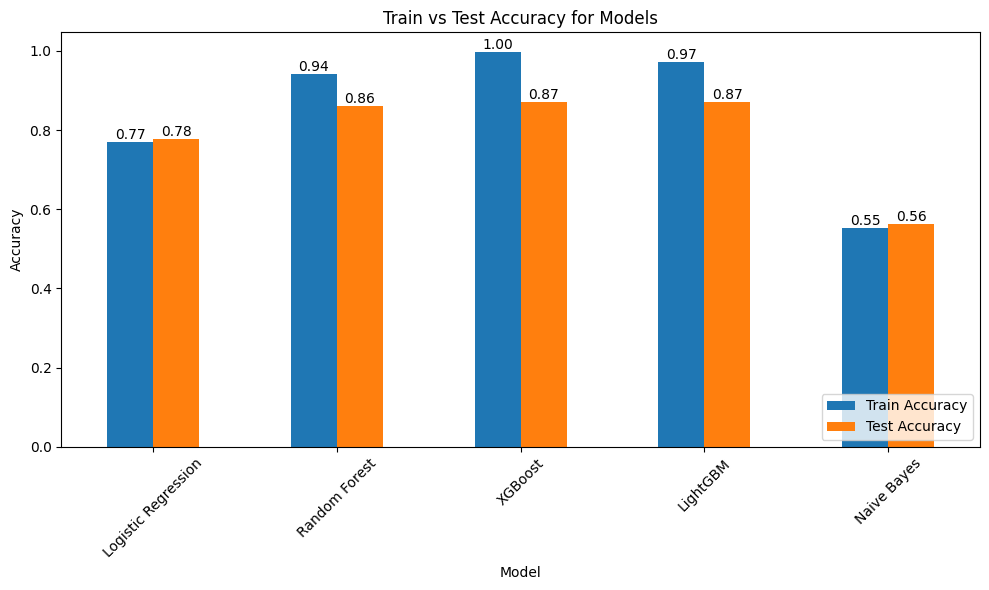

In [ ]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import pandas as pd
import matplotlib.pyplot as plt

# Define class weights for models that support it
class_weights = {0: 1, 1: IR}  # Logistic Regression and Random Forest

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights, max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights = [class_weights[y] for y in y_train]
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()



Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       915
           1       0.25      0.86      0.39        85

    accuracy                           0.77      1000
   macro avg       0.62      0.81      0.62      1000
weighted avg       0.92      0.77      0.82      1000


Logistic Regression - Confusion Matrix:


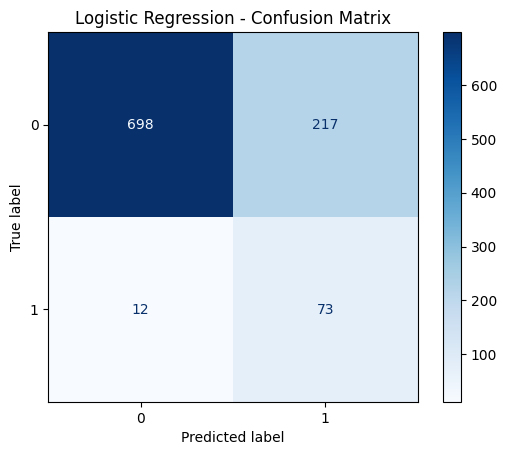


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       915
           1       0.26      0.34      0.29        85

    accuracy                           0.86      1000
   macro avg       0.60      0.62      0.61      1000
weighted avg       0.88      0.86      0.87      1000


Random Forest - Confusion Matrix:


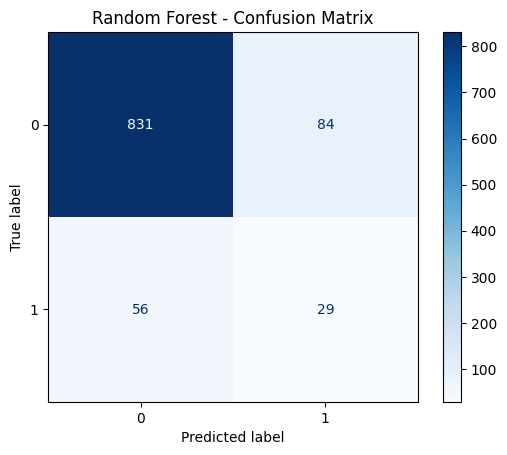


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:16:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       915
           1       0.24      0.24      0.24        85

    accuracy                           0.87      1000
   macro avg       0.58      0.58      0.58      1000
weighted avg       0.87      0.87      0.87      1000


XGBoost - Confusion Matrix:


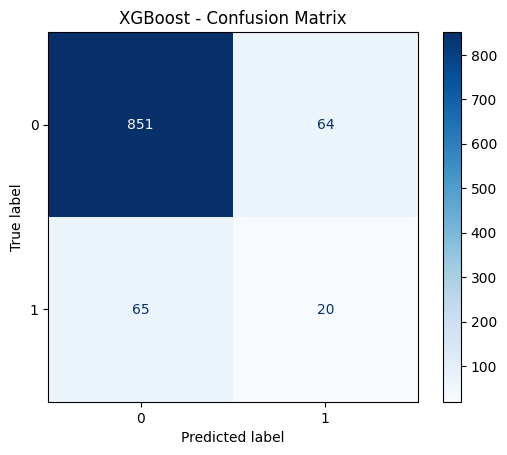


Training LightGBM...
[LightGBM] [Info] Number of positive: 360, number of negative: 3640
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090000 -> initscore=-2.313635
[LightGBM] [Info] Start training from score -2.313635

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       915
           1       0.43      0.04      0.07        85

    accuracy                           0.91      1000
   macro avg       0.67      0.52      0.51      1000
weighted avg       0.88      0.91      0.88      1000


LightGBM - Confusion Matrix:


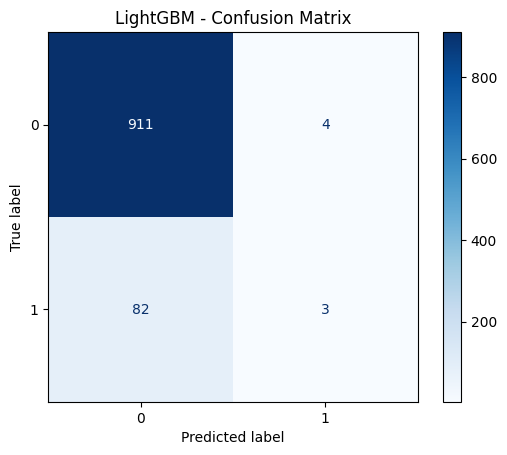


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.54      0.70       915
           1       0.13      0.76      0.23        85

    accuracy                           0.56      1000
   macro avg       0.55      0.65      0.46      1000
weighted avg       0.89      0.56      0.66      1000


Naive Bayes - Confusion Matrix:


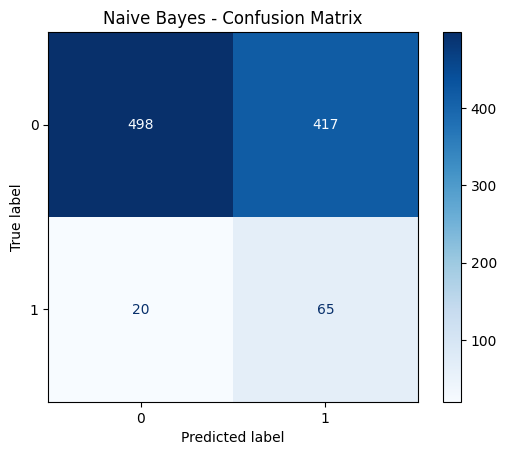


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression         0.76375          0.771  0.864957   
1        Random Forest         0.94350          0.860  0.830704   
2              XGBoost         0.99725          0.871  0.759254   
3             LightGBM         0.94275          0.914  0.832247   
4          Naive Bayes         0.55350          0.563  0.714092   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.859077            0.389333          0.762842          0.858824  
1            0.922309            0.292929          0.908197          0.341176  
2            0.929547            0.236686          0.930055          0.235294  
3            0.954927            0.065217          0.995628          0.035294  
4            0.695045            0.229277          0.544262          0.764706  


<Figure size 1000x600 with 0 Axes>

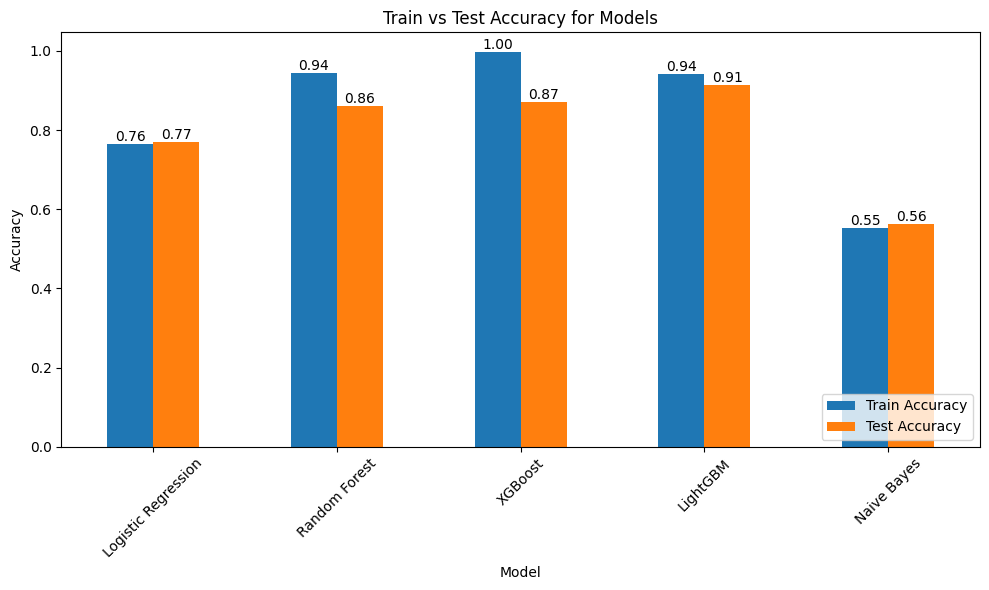

In [ ]:
# Define class weights for models that support it
class_weights2 = {1: 1, 0: (1/IR)}  # Logistic Regression and Random Forest

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights2),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights2, max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=1/IR, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights2 = [class_weights2[y] for y in y_train]
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights2)
    else:
        model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [ ]:
!pip install imbalanced-ensemble
import imbens
from imbens.ensemble.base import sort_dict_by_key

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.6/744.6 kB 13.2 MB/s eta 0:00:00


In [ ]:
cost_matrices = {}

def plot_cost_matrix(cost_matrix, title: str, **kwargs):
    ax = sns.heatmap(data=cost_matrix, **kwargs)
    ax.set_ylabel("Predicted Label")
    ax.set_xlabel("Ground Truth")
    ax.set_title(title)

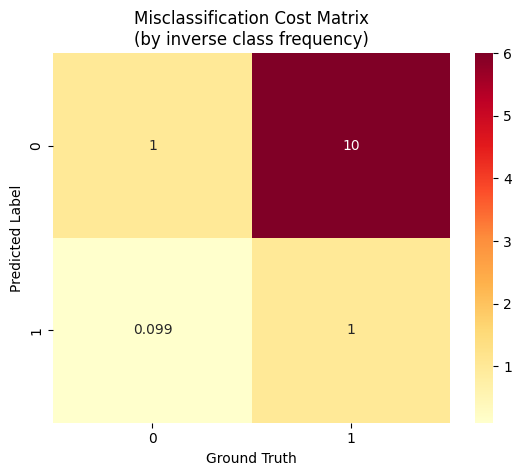

In [ ]:
# Default Cost Matrix

'''init_kwargs = {
    "n_estimators": 50,
    "learning_rate": 1.0,
    "random_state": 10,
}'''

adacost_clf = imbens.ensemble.AdaCostClassifier()
adacost_clf.fit(X_train_scaled, y_train)

cost_matrix1 = adacost_clf.cost_matrix_

title = "Misclassification Cost Matrix\n(by inverse class frequency)"
cost_matrices[title] = adacost_clf.cost_matrix_
plot_cost_matrix(adacost_clf.cost_matrix_, title, annot=True, cmap='YlOrRd', vmax=6)

In [ ]:
cost_matrix1

array([[ 1.        , 10.11111111],
       [ 0.0989011 ,  1.        ]])

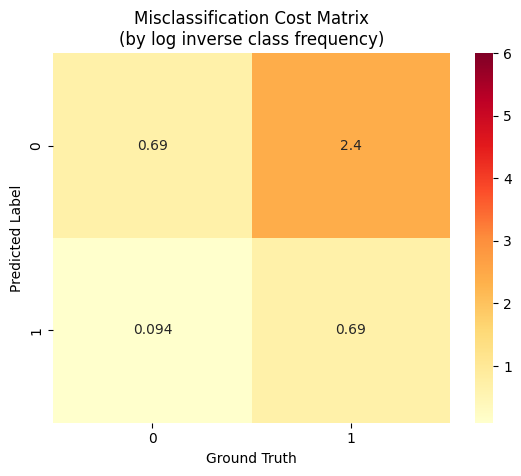

In [ ]:
# log1p-inverse Cost Matrix
adacost_clf.fit(
    X_train_scaled,
    y_train,
    cost_matrix='log1p-inverse',  # set cost matrix by log inverse class frequency
)

cost_matrix2 =adacost_clf.cost_matrix_


title = "Misclassification Cost Matrix\n(by log inverse class frequency)"
cost_matrices[title] = adacost_clf.cost_matrix_
plot_cost_matrix(adacost_clf.cost_matrix_, title, annot=True, cmap='YlOrRd', vmax=6)

In [ ]:
cost_matrix2

array([[0.69314718, 2.40794561],
       [0.09431068, 0.69314718]])

In [ ]:
#  w0 = c0/ (c1+c0)
#  w1 = c1 /(c1+c0)
# These weights are proportional to the misclassification costs and sum to 1, ensuring that higher misclassification costs lead to higher corresponding class weights

class_weights_licf = {0:0.037690255940969176, 1:0.9623097440590308}
class_weights_icf = {0:0.009686677935912087, 1:0.9903133220640878}

In [ ]:
0.037690255940969176 + 0.9623097440590308

1.0


Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.34      0.50       915
           1       0.12      0.99      0.22        85

    accuracy                           0.39      1000
   macro avg       0.56      0.66      0.36      1000
weighted avg       0.92      0.39      0.48      1000


Logistic Regression - Confusion Matrix:


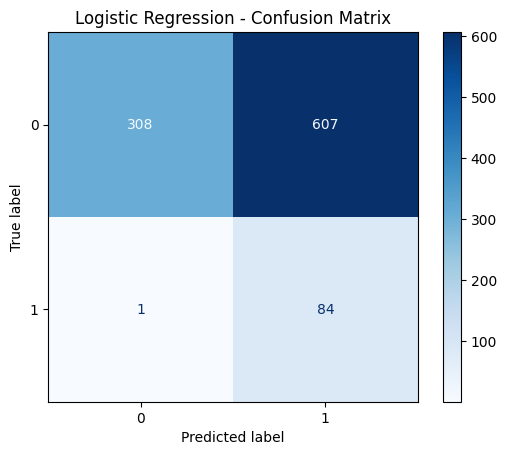


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.45      0.62       915
           1       0.14      0.96      0.24        85

    accuracy                           0.49      1000
   macro avg       0.57      0.71      0.43      1000
weighted avg       0.92      0.49      0.59      1000


Random Forest - Confusion Matrix:


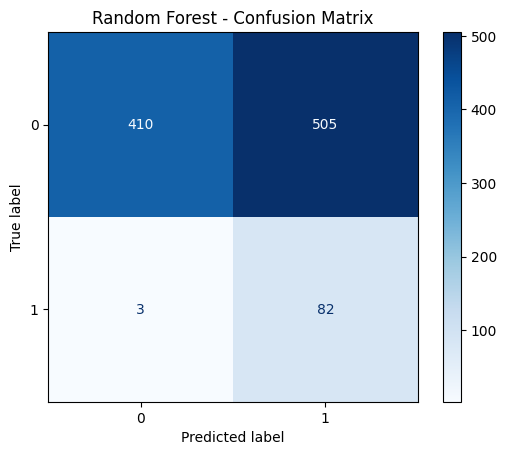


Training XGBoost...

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       915
           1       0.18      0.27      0.22        85

    accuracy                           0.83      1000
   macro avg       0.55      0.58      0.56      1000
weighted avg       0.87      0.83      0.85      1000


XGBoost - Confusion Matrix:


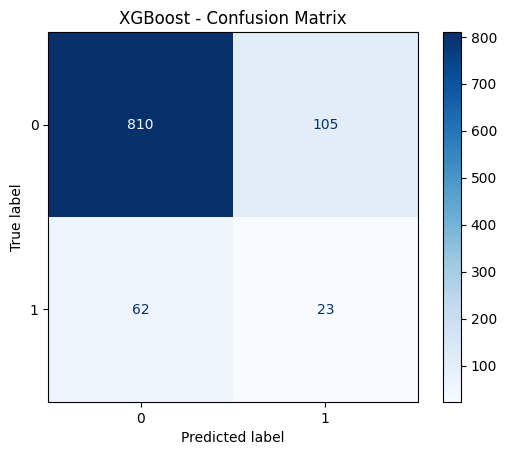


Training LightGBM...
[LightGBM] [Info] Number of positive: 360, number of negative: 3640
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090000 -> initscore=-2.313635
[LightGBM] [Info] Start training from score -2.313635

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       915
           1       0.20      0.56      0.30        85

    accuracy                           0.77      1000
   macro avg       0.58      0.68      0.58      1000
weighted avg       0.89      0.77      0.82      1000


LightGBM - Confusion Matrix:


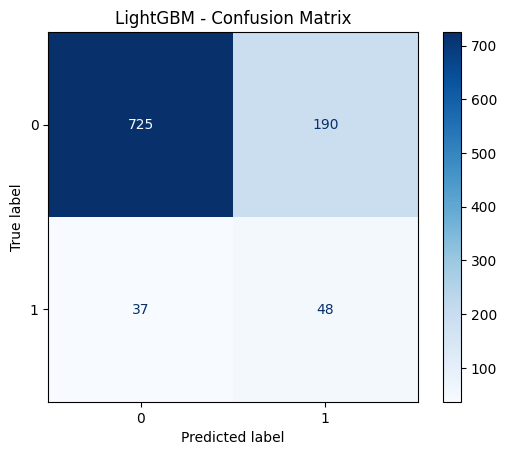


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.49      0.65       915
           1       0.13      0.79      0.22        85

    accuracy                           0.52      1000
   macro avg       0.54      0.64      0.43      1000
weighted avg       0.89      0.52      0.61      1000


Naive Bayes - Confusion Matrix:


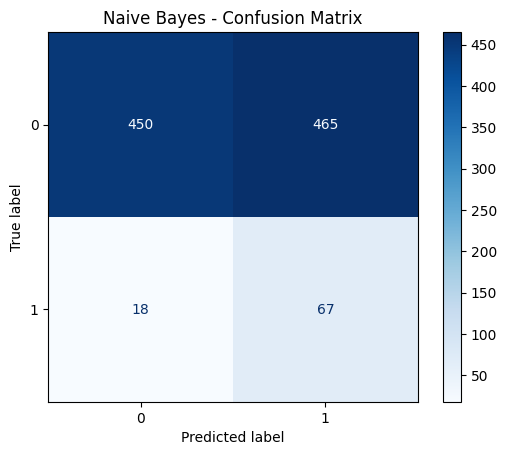


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression         0.38325          0.392  0.864237   
1        Random Forest         0.53400          0.492  0.796593   
2              XGBoost         0.97900          0.833  0.719370   
3             LightGBM         0.88975          0.773  0.809013   
4          Naive Bayes         0.50875          0.517  0.714606   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.503268            0.216495          0.336612          0.988235  
1            0.617470            0.244048          0.448087          0.964706  
2            0.906547            0.215962          0.885246          0.270588  
3            0.864639            0.297214          0.792350          0.564706  
4            0.650759            0.217180          0.491803          0.788235  


<Figure size 1000x600 with 0 Axes>

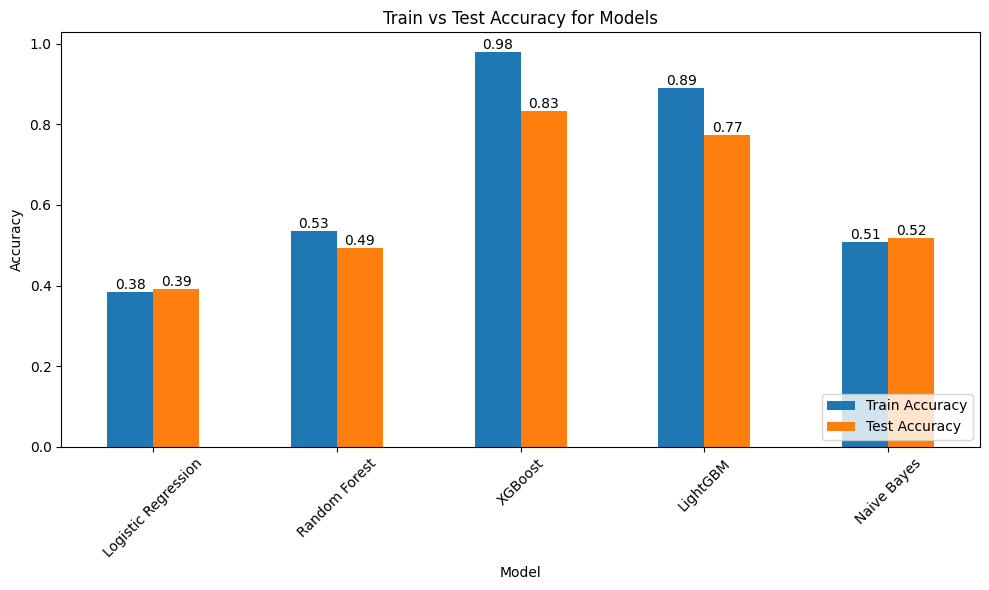

In [ ]:
IR1 = 10.11111111 / 0.0989011

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights_icf),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights_icf, max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR1, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR1, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights = [class_weights_icf[y] for y in y_train]
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()



Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       915
           1       0.17      0.93      0.29        85

    accuracy                           0.62      1000
   macro avg       0.58      0.76      0.52      1000
weighted avg       0.92      0.62      0.70      1000


Logistic Regression - Confusion Matrix:


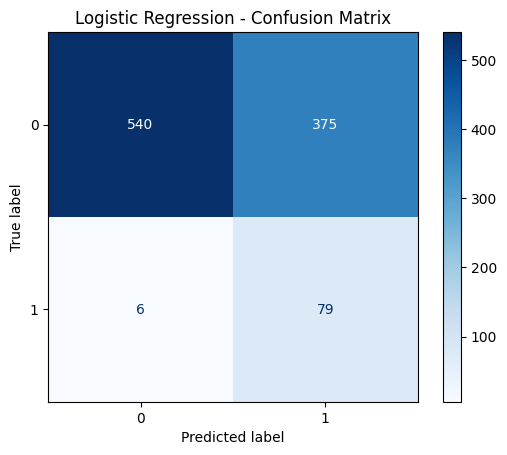


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       915
           1       0.23      0.78      0.35        85

    accuracy                           0.76      1000
   macro avg       0.60      0.77      0.60      1000
weighted avg       0.91      0.76      0.81      1000


Random Forest - Confusion Matrix:


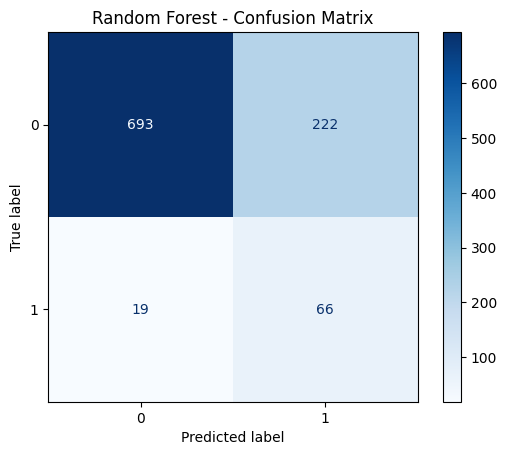


Training XGBoost...

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       915
           1       0.22      0.27      0.24        85

    accuracy                           0.86      1000
   macro avg       0.57      0.59      0.58      1000
weighted avg       0.87      0.86      0.86      1000


XGBoost - Confusion Matrix:


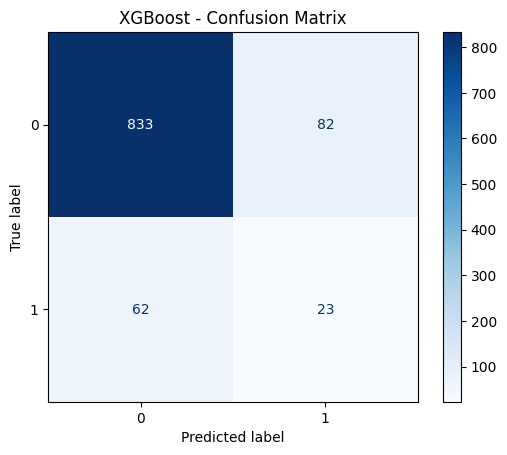


Training LightGBM...
[LightGBM] [Info] Number of positive: 360, number of negative: 3640
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 110
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090000 -> initscore=-2.313635
[LightGBM] [Info] Start training from score -2.313635

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       915
           1       0.24      0.49      0.32        85

    accuracy                           0.82      1000
   macro avg       0.59      0.67      0.61      1000
weighted avg       0.89      0.82      0.85      1000


LightGBM - Confusion Matrix:


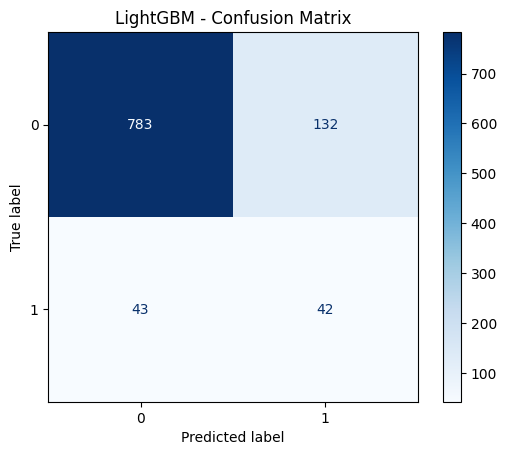


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.52      0.67       915
           1       0.13      0.78      0.22        85

    accuracy                           0.54      1000
   macro avg       0.55      0.65      0.45      1000
weighted avg       0.89      0.54      0.63      1000


Naive Bayes - Confusion Matrix:


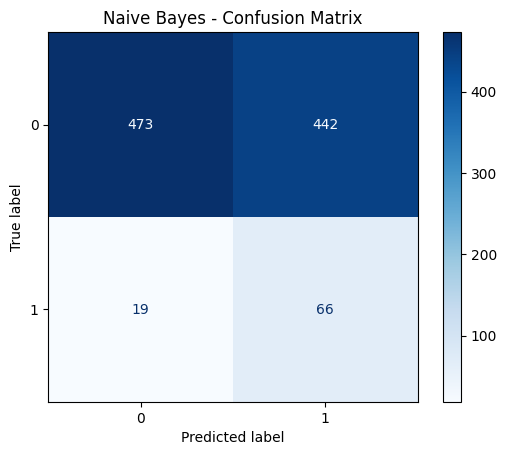


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression         0.61125          0.619  0.865484   
1        Random Forest         0.80700          0.759  0.814812   
2              XGBoost         0.98950          0.856  0.757274   
3             LightGBM         0.94400          0.825  0.812986   
4          Naive Bayes         0.53300          0.539  0.714073   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.739220            0.293135          0.590164          0.929412  
1            0.851875            0.353887          0.757377          0.776471  
2            0.920442            0.242105          0.910383          0.270588  
3            0.899483            0.324324          0.855738          0.494118  
4            0.672353            0.222597          0.516940          0.776471  


<Figure size 1000x600 with 0 Axes>

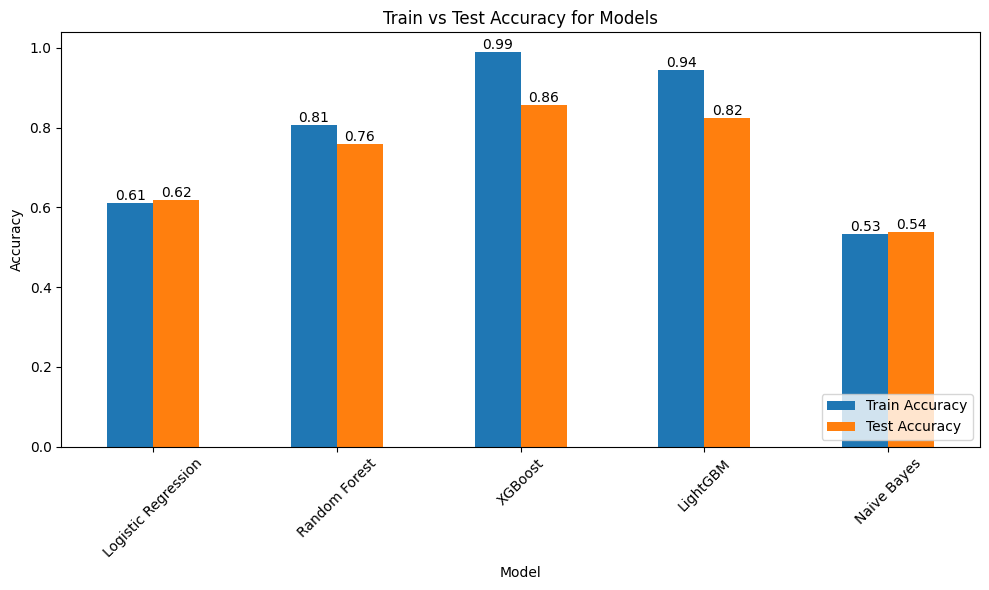

In [ ]:
IR2 = 2.40794561/0.09431068

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights_licf),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights_licf, max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR2, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR2, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights = [class_weights_licf[y] for y in y_train]
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Training Balanced Random Forest...

Balanced Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       915
           1       0.28      0.75      0.41        85

    accuracy                           0.82      1000
   macro avg       0.63      0.79      0.65      1000
weighted avg       0.91      0.82      0.85      1000


Balanced Random Forest - Confusion Matrix:


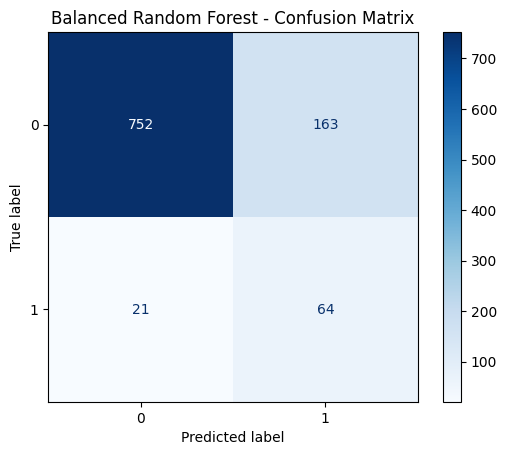


Training Easy Ensemble Classifier...

Easy Ensemble Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       915
           1       0.23      0.89      0.37        85

    accuracy                           0.74      1000
   macro avg       0.61      0.81      0.61      1000
weighted avg       0.92      0.74      0.80      1000


Easy Ensemble Classifier - Confusion Matrix:


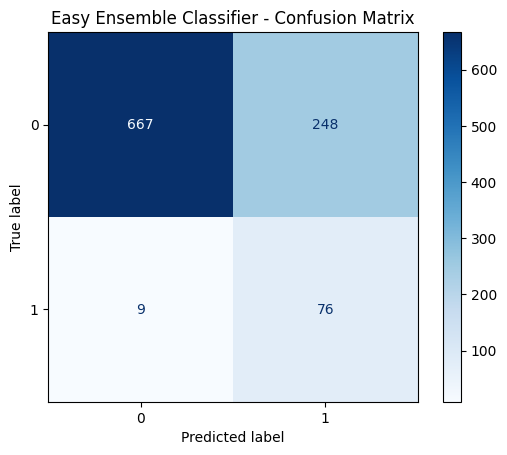


Model Performance Results:
                      Model  Train Accuracy  Test Accuracy  \
0    Balanced Random Forest          0.8775          0.816   
1  Easy Ensemble Classifier          0.7450          0.743   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.890995            0.410256          0.821858          0.752941  
1            0.838466            0.371638          0.728962          0.894118  


<Figure size 1000x600 with 0 Axes>

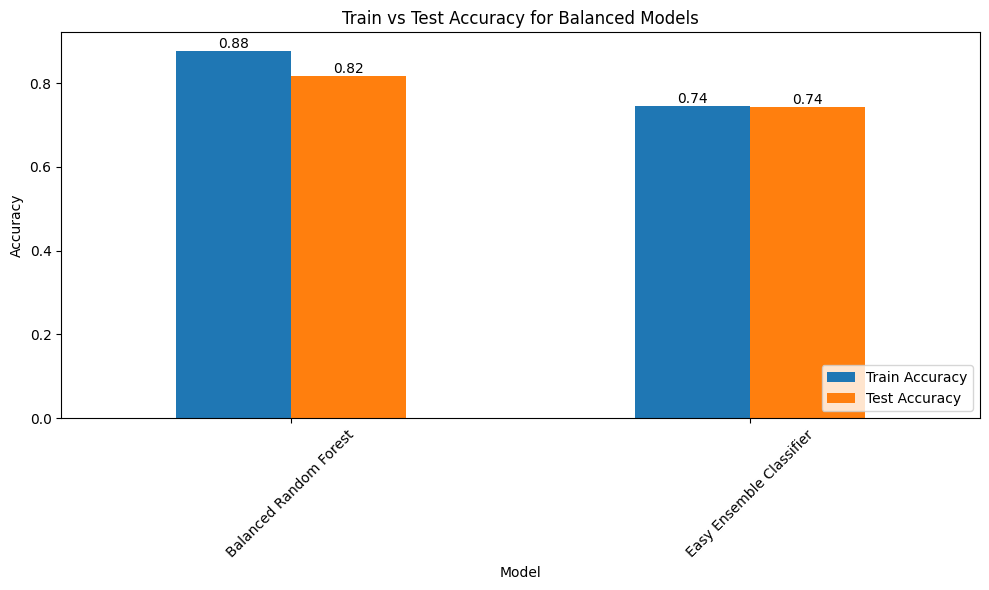

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Train and evaluate the models
models = {
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "Easy Ensemble Classifier": EasyEnsembleClassifier(random_state=42)
}

results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Balanced Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Hyperparameter tuning

In [ ]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Scale features
'''scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)'''

# Objective function for Logistic Regression hyperparameter optimization without penalty
def objective_lr(trial):
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])  # Include penalty
    solver = trial.suggest_categorical("solver", ["liblinear", "saga", "lbfgs"])  # Solver optimization

    # Ensure solver compatibility with penalty
    if penalty == "l1" and solver not in ["liblinear", "saga"]:
        raise optuna.exceptions.TrialPruned()
    if penalty == "elasticnet" and solver != "saga":
        raise optuna.exceptions.TrialPruned()

    param = {
        "C": trial.suggest_float("C", 0.01, 10.0, log=True),
        "penalty": penalty,
        "solver": solver,
        "l1_ratio": trial.suggest_float("l1_ratio", 0.0, 1.0) if penalty == "elasticnet" else None,
        "max_iter": trial.suggest_int("max_iter", 25, 75),
    }

    # Define the model
    model = LogisticRegression(
        random_state=10,
        **{k: v for k, v in param.items() if v is not None}  # Exclude None values
    )
    score = cross_val_score(model, X_train_scaled, y_train, scoring="roc_auc", cv=5, n_jobs=-1)
    return score.mean()

# Run the optimization
study_lr = optuna.create_study(direction="maximize")
study_lr.optimize(objective_lr, n_trials=50)

# Best parameters and score
print("Best parameters for Logistic Regression:", study_lr.best_params)
print("Best AUC for Logistic Regression:", study_lr.best_value)



[I 2025-03-03 11:19:28,177] A new study created in memory with name: no-name-d03ab8be-0644-46c1-8fb2-91f6a2ea34ce
[I 2025-03-03 11:19:31,251] Trial 0 finished with value: 0.8262095543345543 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.15271743244852165, 'max_iter': 41}. Best is trial 0 with value: 0.8262095543345543.
[I 2025-03-03 11:19:31,256] Trial 1 pruned. 
[I 2025-03-03 11:19:34,106] Trial 2 finished with value: 0.8030811202686202 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.021301627135305524, 'max_iter': 44}. Best is trial 0 with value: 0.8262095543345543.
[I 2025-03-03 11:19:34,110] Trial 3 pruned. 
[I 2025-03-03 11:19:35,070] Trial 4 finished with value: 0.821329365079365 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.6952826102492017, 'max_iter': 69}. Best is trial 0 with value: 0.8262095543345543.
[I 2025-03-03 11:19:35,401] Trial 5 finished with value: 0.8291285103785103 and parameters: {'penalty': 'l2', 'solver': 'lbfgs', 'C': 0

Best parameters for Logistic Regression: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.032562576407547485, 'l1_ratio': 0.1479383001443756, 'max_iter': 68}
Best AUC for Logistic Regression: 0.8315247252747252


In [ ]:
best_lr_params = study_lr.best_params
best_lr_params

{'penalty': 'elasticnet',
 'solver': 'saga',
 'C': 0.032562576407547485,
 'l1_ratio': 0.1479383001443756,
 'max_iter': 68}

In [ ]:
'''best_lr_params = best_lr_params = {
    'penalty': 'elasticnet',
    'solver': 'saga',
    'C': 0.012110258770813023,
    'l1_ratio': 0.3816688063003687,
    'max_iter': 310
}'''

In [ ]:
IR = 10.24

In [ ]:
class_weightslr = {1:IR,0:1}
logi_model = LogisticRegression(**best_lr_params, class_weight=class_weightslr, random_state=10, n_jobs=-1)
logi_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.032562576407547485, class_weight={0: 1, 1: 10.24},
                   l1_ratio=0.1479383001443756, max_iter=68, n_jobs=-1,
                   penalty='elasticnet', random_state=10, solver='saga')

In [ ]:
# Predict on the test set
y_pred_logi = logi_model.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred_logi))

# Generate confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logi))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       915
           1       0.24      0.88      0.38        85

    accuracy                           0.76      1000
   macro avg       0.61      0.81      0.62      1000
weighted avg       0.92      0.76      0.81      1000

Confusion Matrix:
 [[683 232]
 [ 10  75]]


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob_logi = logi_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
auc_roc = roc_auc_score(y_test, y_prob_logi)

print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.8695339119254258



Evaluating Logistic Regression with Class Weights ICF (0.0097, 0.9903)...

Class Weights ICF (0.0097, 0.9903) - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       915
           1       0.09      1.00      0.16        85

    accuracy                           0.09      1000
   macro avg       0.04      0.50      0.08      1000
weighted avg       0.01      0.09      0.01      1000

Class Weights ICF (0.0097, 0.9903) - AUC: 0.5


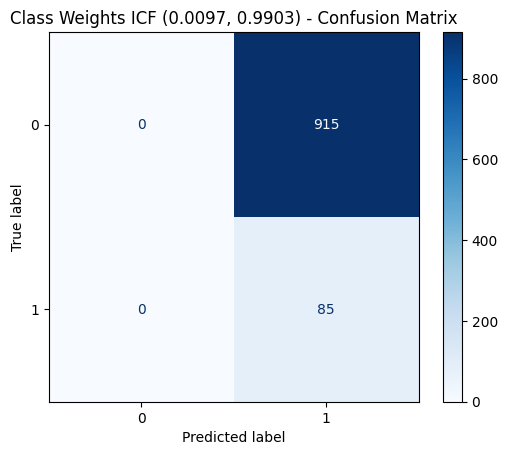


Evaluating Logistic Regression with Class Weights IR (1/10.24 ,1)...

Class Weights IR (1/10.24 ,1) - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       915
           1       0.24      0.87      0.37        85

    accuracy                           0.75      1000
   macro avg       0.61      0.81      0.61      1000
weighted avg       0.92      0.75      0.81      1000

Class Weights IR (1/10.24 ,1) - AUC: 0.8631243972999034


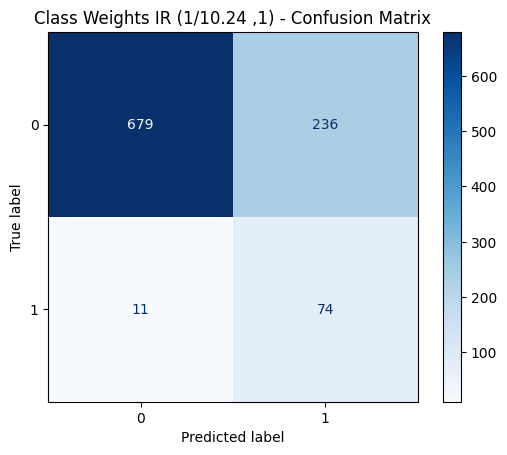

In [ ]:
class_weights_icf = {0: 0.009686677935912087, 1: 0.9903133220640878}
class_weights_ir = {0:(1 / 10.24), 1:1}

# Function to evaluate Logistic Regression with specified class weights
def evaluate_model_with_weights(weights, weight_name):
    print(f"\nEvaluating Logistic Regression with {weight_name}...")

    # Train the model with the specified class weights
    clf_lr = LogisticRegression(
        random_state=10,
        **{k: v for k, v in study_lr.best_params.items() if v is not None},  # Use best params
        class_weight=weights
    )
    clf_lr.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = clf_lr.predict(X_test_scaled)
    y_prob = clf_lr.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    print(f"\n{weight_name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{weight_name} - AUC:", roc_auc_score(y_test, y_prob))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_lr.classes_).plot(cmap='Blues')
    plt.title(f"{weight_name} - Confusion Matrix")
    plt.show()

# Evaluate the model with the two different weights
evaluate_model_with_weights(class_weights_icf, "Class Weights ICF (0.0097, 0.9903)")
evaluate_model_with_weights(class_weights_ir, "Class Weights IR (1/10.24 ,1)")

In [ ]:
# Objective function for Easy Ensemble hyperparameter optimization
def objective_eec(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 200),
        "base_estimator__max_depth": trial.suggest_int("base_estimator__max_depth", 3, 15),
        "base_estimator__min_samples_split": trial.suggest_int("base_estimator__min_samples_split", 2, 10),
        "base_estimator__min_samples_leaf": trial.suggest_int("base_estimator__min_samples_leaf", 1, 5),
        "base_estimator__max_features": trial.suggest_float("base_estimator__max_features", 0.5, 1.0),
    }

    # Define the model with tuned parameters
    model = EasyEnsembleClassifier(random_state=10, n_estimators=param["n_estimators"])

    # Perform cross-validation
    score = cross_val_score(model, X_train_scaled, y_train, scoring="roc_auc", cv=2, n_jobs=-1)
    return score.mean()

# Run the optimization
study_eec = optuna.create_study(direction="maximize")
study_eec.optimize(objective_eec, n_trials=35)

# Best parameters and score
print("Best parameters for Easy Ensemble Classifier:", study_eec.best_params)
print("Best AUC for Easy Ensemble Classifier:", study_eec.best_value)

[I 2025-01-22 16:58:27,015] A new study created in memory with name: no-name-f53424dd-74d6-48d2-9d8f-a7ce188b17e3
[I 2025-01-22 16:59:29,595] Trial 0 finished with value: 0.8182112332112332 and parameters: {'n_estimators': 178, 'base_estimator__max_depth': 6, 'base_estimator__min_samples_split': 6, 'base_estimator__min_samples_leaf': 2, 'base_estimator__max_features': 0.8165581862347191}. Best is trial 0 with value: 0.8182112332112332.
[I 2025-01-22 17:00:40,091] Trial 1 finished with value: 0.8180677655677655 and parameters: {'n_estimators': 198, 'base_estimator__max_depth': 5, 'base_estimator__min_samples_split': 10, 'base_estimator__min_samples_leaf': 1, 'base_estimator__max_features': 0.6428077930892864}. Best is trial 0 with value: 0.8182112332112332.
[I 2025-01-22 17:01:05,126] Trial 2 finished with value: 0.8186202686202686 and parameters: {'n_estimators': 73, 'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 10, 'base_estimator__min_samples_leaf': 2, 'base_es

Best parameters for Easy Ensemble Classifier: {'n_estimators': 73, 'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 10, 'base_estimator__min_samples_leaf': 2, 'base_estimator__max_features': 0.7515451808873358}
Best AUC for Easy Ensemble Classifier: 0.8186202686202686



Easy Ensemble Classifier with Tuned Parameters Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.84       915
           1       0.24      0.92      0.38        85

    accuracy                           0.74      1000
   macro avg       0.61      0.82      0.61      1000
weighted avg       0.93      0.74      0.80      1000

Easy Ensemble Classifier AUC: 0.8608807457409193


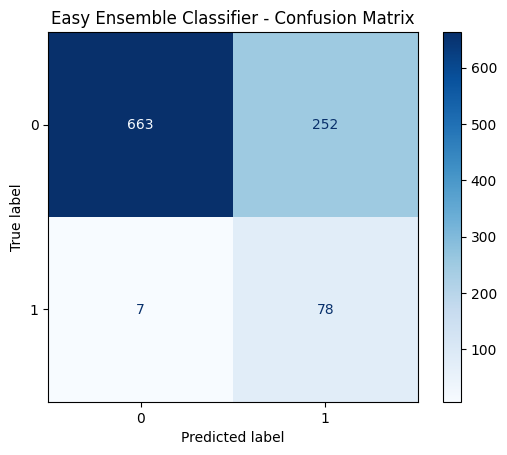

In [ ]:
# Train the model with the best parameters
best_eec_params = study_eec.best_params
clf_eec = EasyEnsembleClassifier(
    random_state=10, n_estimators=best_eec_params["n_estimators"]
)
clf_eec.fit(X_train_scaled, y_train)

# Evaluate Easy Ensemble
y_pred_eec = clf_eec.predict(X_test_scaled)
y_prob_eec = clf_eec.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("\nEasy Ensemble Classifier with Tuned Parameters Classification Report:")
print(classification_report(y_test, y_pred_eec))
print("Easy Ensemble Classifier AUC:", roc_auc_score(y_test, y_prob_eec))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_eec)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_eec.classes_).plot(cmap='Blues')
plt.title("Easy Ensemble Classifier - Confusion Matrix")
plt.show()


Model Performance Results:
                                  Model  Train Accuracy  Test Accuracy  \
0  Easy Ensemble Classifier (Optimized)         0.74975          0.741   

    AUC-ROC  F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  \
0  0.860881            0.836593            0.375904           0.72459   

   Recall (Class 1)  
0          0.917647  


<Figure size 800x500 with 0 Axes>

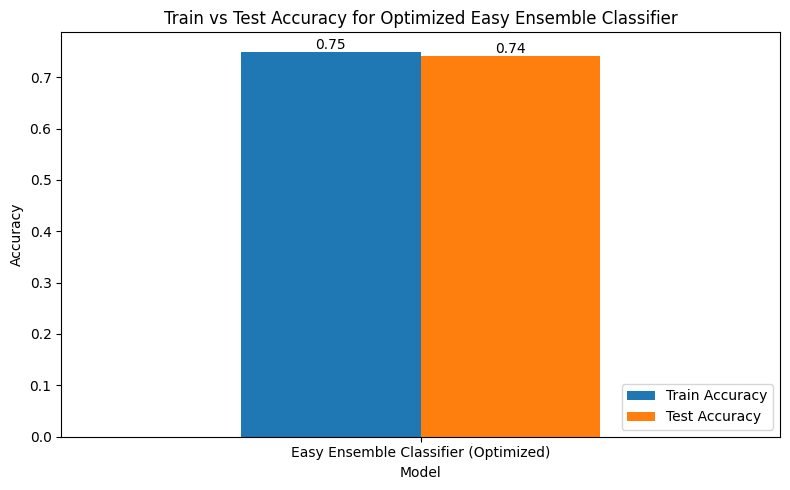

In [ ]:
# Metrics Summary
train_accuracy = clf_eec.score(X_train_scaled, y_train)
test_accuracy = clf_eec.score(X_test_scaled, y_test)
classification_metrics = classification_report(
    y_test, y_pred_eec, output_dict=True, target_names=["Class 0", "Class 1"]
)
f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
recall_class_0 = classification_metrics["Class 0"]["recall"]
recall_class_1 = classification_metrics["Class 1"]["recall"]

results = [{
    "Model": "Easy Ensemble Classifier (Optimized)",
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy,
    "AUC-ROC": roc_auc_score(y_test, y_prob_eec),
    "F1-Score (Class 0)": f1_score_class_0,
    "F1-Score (Class 1)": f1_score_class_1,
    "Recall (Class 0)": recall_class_0,
    "Recall (Class 1)": recall_class_1
}]

results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(8, 5))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(8, 5))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.title("Train vs Test Accuracy for Optimized Easy Ensemble Classifier")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# DL Algorithm

In [ ]:
data_copy2

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.68,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.73,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,1.73,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,1.68,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.60,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,North Dakota,Male,Good,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.83,104.33,31.19,Yes,Yes,Yes,Yes,"Yes, received Tdap",No,Yes
4996,New York,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.60,63.50,24.80,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
4997,Washington,Male,Good,30.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,7.0,1 to 5,No,...,1.88,157.85,44.68,Yes,No,No,No,"Yes, received Tdap",No,No
4998,New York,Female,Very good,3.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,49.90,17.23,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes


In [ ]:
data_copy2['HeartConditionBinary'] = ((data_copy2['HadHeartAttack'] == 'Yes') | (data_copy2['HadAngina'] == 'Yes')).astype(int)
data_copy2 = data_copy2.drop(['HadHeartAttack','HadAngina'],axis=1)
data_copy2

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,No,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,North Dakota,Male,Good,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,104.33,31.19,Yes,Yes,Yes,Yes,"Yes, received Tdap",No,Yes,0
4996,New York,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,63.50,24.80,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,0
4997,Washington,Male,Good,30.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,7.0,1 to 5,No,...,157.85,44.68,Yes,No,No,No,"Yes, received Tdap",No,No,0
4998,New York,Female,Very good,3.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,17.23,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes,0


In [ ]:
numerical_cols2 = data_copy2.select_dtypes(include=['float64','number']).columns
numerical_data2 = data_copy2[numerical_cols]
numerical_data2

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,1.68,113.40,40.35
1,2.0,5.0,8.0,1.73,104.33,34.97
2,7.0,10.0,6.0,1.73,104.33,34.97
3,20.0,10.0,8.0,1.68,127.01,45.19
4,0.0,0.0,7.0,1.60,49.90,19.49
...,...,...,...,...,...,...
4995,0.0,2.0,6.0,1.83,104.33,31.19
4996,0.0,0.0,7.0,1.60,63.50,24.80
4997,30.0,0.0,7.0,1.88,157.85,44.68
4998,3.0,2.0,7.0,1.70,49.90,17.23


In [ ]:
categorical_cols2 = data_copy2.select_dtypes(include=['object','category']).columns

#1)TabNET

In [ ]:
!pip install pytorch-tabnet
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# Step 1: Encode categorical features
label_encoders = {}
cat_idxs = []
cat_dims = []

for col in categorical_cols2:
    le = LabelEncoder()
    data_copy2[col] = le.fit_transform(data_copy2[col].astype(str))  # Ensure data is string for LabelEncoder
    label_encoders[col] = le
    cat_idxs.append(data_copy2.columns.get_loc(col))  # Store column index
    cat_dims.append(len(le.classes_))  # Store number of unique classes

In [ ]:
# Step 2: Separate features and target
target = "HeartConditionBinary"
features = [col for col in data_copy2.columns if col != target]

X = data_copy2[features].values
y = data_copy2[target].values

# Step 3: Train-Validation-Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (3500, 38) (3500,)
Validation set shape: (750, 38) (750,)
Test set shape: (750, 38) (750,)


In [ ]:
# Step 4: Confirm data types
print(f"X_train: {type(X_train)}, dtype: {X_train.dtype}")
print(f"X_valid: {type(X_valid)}, dtype: {X_valid.dtype}")
print(f"y_train: {type(y_train)}, dtype: {y_train.dtype}")
print(f"y_valid: {type(y_valid)}, dtype: {y_valid.dtype}")
print(f"X_test: {type(X_test)}, dtype: {X_test.dtype}")
print(f"y_test: {type(y_test)}, dtype: {y_test.dtype}")

X_train: <class 'numpy.ndarray'>, dtype: float64
X_valid: <class 'numpy.ndarray'>, dtype: float64
y_train: <class 'numpy.ndarray'>, dtype: int64
y_valid: <class 'numpy.ndarray'>, dtype: int64
X_test: <class 'numpy.ndarray'>, dtype: float64
y_test: <class 'numpy.ndarray'>, dtype: int64


# NO CSL

In [ ]:
# TabNet parameters
tabnet_params = {
    "cat_idxs": cat_idxs,
    "cat_dims": cat_dims,
    "cat_emb_dim": 2,  # Embedding dimension for categorical features
    "optimizer_fn": torch.optim.Adam,
    "optimizer_params": dict(lr=2e-2),
    "scheduler_params": {"step_size": 50, "gamma": 0.9},
    "scheduler_fn": torch.optim.lr_scheduler.StepLR,
    "mask_type": "entmax",  # Use 'entmax' for sparse attention
    "device_name": "cuda" if torch.cuda.is_available() else "cpu",
}

# Initialize TabNet Classifier
clf = TabNetClassifier(**tabnet_params)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize an empty list to store results
results = []

# Train the model without class weights (using the original training set)
clf.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=["train", "valid"],
    eval_metric=["auc"],
    max_epochs=100,  # Train for 100 epochs
    patience=15,  # Allow early stopping after 15 epochs without improvement
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
)

# Generate predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score for both classes (0 and 1)
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)

precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Store the results
results.append({
    'Test Accuracy': test_accuracy,
    'Train Accuracy': train_accuracy,
    'Precision (Class 0)': precision_class_0,
    'Recall (Class 0)': recall_class_0,
    'F1 Score (Class 0)': f1_class_0,
    'Precision (Class 1)': precision_class_1,
    'Recall (Class 1)': recall_class_1,
    'F1 Score (Class 1)': f1_class_1,
    'AUC-ROC Score': auc_score
})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

epoch 0  | loss: 0.61201 | train_auc: 0.55153 | valid_auc: 0.60467 |  0:00:03s
epoch 1  | loss: 0.36842 | train_auc: 0.55734 | valid_auc: 0.54232 |  0:00:04s
epoch 2  | loss: 0.32769 | train_auc: 0.57673 | valid_auc: 0.49357 |  0:00:04s
epoch 3  | loss: 0.30591 | train_auc: 0.56991 | valid_auc: 0.59858 |  0:00:05s
epoch 4  | loss: 0.29133 | train_auc: 0.6088  | valid_auc: 0.60394 |  0:00:06s
epoch 5  | loss: 0.28615 | train_auc: 0.59414 | valid_auc: 0.60315 |  0:00:06s
epoch 6  | loss: 0.27488 | train_auc: 0.67278 | valid_auc: 0.63009 |  0:00:08s
epoch 7  | loss: 0.27333 | train_auc: 0.68091 | valid_auc: 0.63055 |  0:00:09s
epoch 8  | loss: 0.26752 | train_auc: 0.6727  | valid_auc: 0.64035 |  0:00:10s
epoch 9  | loss: 0.2677  | train_auc: 0.67352 | valid_auc: 0.65827 |  0:00:11s
epoch 10 | loss: 0.26255 | train_auc: 0.69461 | valid_auc: 0.6803  |  0:00:12s
epoch 11 | loss: 0.26206 | train_auc: 0.71201 | valid_auc: 0.69346 |  0:00:13s
epoch 12 | loss: 0.25677 | train_auc: 0.72791 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


   Test Accuracy  Train Accuracy  Precision (Class 0)  Recall (Class 0)  \
0          0.888        0.920571              0.90068          0.983655   

   F1 Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.940341             0.266667          0.051948   

   F1 Score (Class 1)  AUC-ROC Score  
0            0.086957       0.739797  


#CSL

In [ ]:
weight_options = [
    {0: 1, 1: 10.24},
    {0: (1/10.24), 1: 1},
    {0: 0.009686677935912087, 1: 0.9903133220640878},
    {0:0.037690255940969176, 1:0.9623097440590308}
]

#class_weights_licf = {0:0.037690255940969176, 1:0.9623097440590308}
#class_weights_icf = {0:0.009686677935912087, 1:0.9903133220640878}

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score, classification_report

results = []  # Store all results

for i, class_weights in enumerate(weight_options):
    print(f"\n### Training with Weight Set {i+1}: {class_weights}")

    # Initialize TabNet
    clf = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=5,  # Fixed for now
        optimizer_fn=torch.optim.Adam,
        optimizer_params={"lr": 0.01},  # Fixed for now
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type="entmax",
        device_name="cuda" if torch.cuda.is_available() else "cpu",
    )

    # Train the model with all datasets in eval_set
    clf.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_valid, y_valid), (X_test, y_test), (X_train, y_train)],
        eval_name=["valid", "test", "train"],
        eval_metric=["auc"],
        max_epochs=40,
        patience=30,
        batch_size=256,
        virtual_batch_size=128,
        weights=class_weights,
        num_workers=0,
        drop_last=False,
    )

    # Extract AUC from training history
    valid_auc = max(clf.history["valid_auc"])  # Best validation AUC
    test_auc = max(clf.history["test_auc"])  # Best test AUC
    train_auc = max(clf.history["train_auc"])  # Best train AUC

    # Predictions for validation
    preds_valid = clf.predict(X_valid)
    preds_valid_proba = clf.predict_proba(X_valid)[:, 1]  # For AUC calculation

    # Predictions for test
    preds_test = clf.predict(X_test)
    preds_test_proba = clf.predict_proba(X_test)[:, 1]

    # Predictions for train
    preds_train = clf.predict(X_train)
    preds_train_proba = clf.predict_proba(X_train)[:, 1]

    # Compute additional metrics for Train
    train_accuracy = accuracy_score(y_train, preds_train)
    train_recall = recall_score(y_train, preds_train, average=None)
    train_f1 = f1_score(y_train, preds_train, average=None)

    # Compute additional metrics for Validation
    valid_accuracy = accuracy_score(y_valid, preds_valid)
    valid_recall = recall_score(y_valid, preds_valid, average=None)
    valid_f1 = f1_score(y_valid, preds_valid, average=None)

    # Compute additional metrics for Test
    test_accuracy = accuracy_score(y_test, preds_test)
    test_recall = recall_score(y_test, preds_test, average=None)
    test_f1 = f1_score(y_test, preds_test, average=None)

    # Compute confusion matrices
    train_conf_matrix = confusion_matrix(y_train, preds_train)
    valid_conf_matrix = confusion_matrix(y_valid, preds_valid)
    test_conf_matrix = confusion_matrix(y_test, preds_test)

    # Compute classification reports
    train_classification_report = classification_report(y_train, preds_train, output_dict=True)
    valid_classification_report = classification_report(y_valid, preds_valid, output_dict=True)
    test_classification_report = classification_report(y_test, preds_test, output_dict=True)

    # Store results
    results.append({
        "Weight Set": i + 1,
        "Class Weights": class_weights,

        "Train AUC": train_auc,
        "Train Accuracy": train_accuracy,
        "Train Recall (class 0 & 1)": train_recall.tolist(),
        "Train F1-score (class 0 & 1)": train_f1.tolist(),
        "Train Confusion Matrix": train_conf_matrix.tolist(),
        "Train Classification Report": train_classification_report,

        "Validation AUC": valid_auc,
        "Validation Accuracy": valid_accuracy,
        "Validation Recall (class 0 & 1)": valid_recall.tolist(),
        "Validation F1-score (class 0 & 1)": valid_f1.tolist(),
        "Validation Confusion Matrix": valid_conf_matrix.tolist(),
        "Validation Classification Report": valid_classification_report,

        "Test AUC": test_auc,
        "Test Accuracy": test_accuracy,
        "Test Recall (class 0 & 1)": test_recall.tolist(),
        "Test F1-score (class 0 & 1)": test_f1.tolist(),
        "Test Confusion Matrix": test_conf_matrix.tolist(),
        "Test Classification Report": test_classification_report,
    })

    print("\n📌 **Performance Summary for Weight Set", i+1, "**")
    print(f"Train AUC: {train_auc:.4f}, Validation AUC: {valid_auc:.4f}, Test AUC: {test_auc:.4f}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {valid_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

    print("\n🔹 **Train Classification Report**:")
    print(classification_report(y_train, preds_train))
    print("\nTrain Confusion Matrix:\n", train_conf_matrix)

    print("\n🔹 **Validation Classification Report**:")
    print(classification_report(y_valid, preds_valid))
    print("\nValidation Confusion Matrix:\n", valid_conf_matrix)

    print("\n🔹 **Test Classification Report**:")
    print(classification_report(y_test, preds_test))
    print("\nTest Confusion Matrix:\n", test_conf_matrix)



### Training with Weight Set 1: {0: 1, 1: 10.24}


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.03297 | valid_auc: 0.47882 | test_auc: 0.49391 | train_auc: 0.52556 |  0:00:03s
epoch 1  | loss: 0.70369 | valid_auc: 0.55635 | test_auc: 0.58002 | train_auc: 0.59407 |  0:00:04s
epoch 2  | loss: 0.64072 | valid_auc: 0.61024 | test_auc: 0.59926 | train_auc: 0.64193 |  0:00:06s
epoch 3  | loss: 0.61507 | valid_auc: 0.69045 | test_auc: 0.65265 | train_auc: 0.69177 |  0:00:07s
epoch 4  | loss: 0.55467 | valid_auc: 0.75047 | test_auc: 0.69449 | train_auc: 0.74167 |  0:00:08s
epoch 5  | loss: 0.52523 | valid_auc: 0.77093 | test_auc: 0.7184  | train_auc: 0.76962 |  0:00:10s
epoch 6  | loss: 0.48982 | valid_auc: 0.7467  | test_auc: 0.72563 | train_auc: 0.78276 |  0:00:11s
epoch 7  | loss: 0.47154 | valid_auc: 0.75734 | test_auc: 0.73185 | train_auc: 0.79825 |  0:00:13s
epoch 8  | loss: 0.46232 | valid_auc: 0.76887 | test_auc: 0.73214 | train_auc: 0.80647 |  0:00:16s
epoch 9  | loss: 0.43843 | valid_auc: 0.76146 | test_auc: 0.72575 | train_auc: 0.81539 |  0:00:18s
epoch 10 |

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



📌 **Performance Summary for Weight Set 1 **
Train AUC: 0.9956, Validation AUC: 0.8067, Test AUC: 0.7903
Train Accuracy: 0.9620, Validation Accuracy: 0.8507, Test Accuracy: 0.8280

🔹 **Train Classification Report**:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3185
           1       0.70      1.00      0.83       315

    accuracy                           0.96      3500
   macro avg       0.85      0.98      0.90      3500
weighted avg       0.97      0.96      0.96      3500


Train Confusion Matrix:
 [[3052  133]
 [   0  315]]

🔹 **Validation Classification Report**:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       697
           1       0.21      0.40      0.27        53

    accuracy                           0.85       750
   macro avg       0.58      0.64      0.59       750
weighted avg       0.90      0.85      0.87       750


Validation Confusion Matrix:
 [[617

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.03297 | valid_auc: 0.47882 | test_auc: 0.49391 | train_auc: 0.52556 |  0:00:00s
epoch 1  | loss: 0.70369 | valid_auc: 0.55635 | test_auc: 0.58002 | train_auc: 0.59407 |  0:00:01s
epoch 2  | loss: 0.64072 | valid_auc: 0.61024 | test_auc: 0.59926 | train_auc: 0.64193 |  0:00:01s
epoch 3  | loss: 0.61507 | valid_auc: 0.69045 | test_auc: 0.65265 | train_auc: 0.69177 |  0:00:02s
epoch 4  | loss: 0.55467 | valid_auc: 0.75047 | test_auc: 0.69449 | train_auc: 0.74167 |  0:00:03s
epoch 5  | loss: 0.52523 | valid_auc: 0.77093 | test_auc: 0.7184  | train_auc: 0.76962 |  0:00:04s
epoch 6  | loss: 0.48982 | valid_auc: 0.7467  | test_auc: 0.72563 | train_auc: 0.78276 |  0:00:04s
epoch 7  | loss: 0.47154 | valid_auc: 0.75734 | test_auc: 0.73185 | train_auc: 0.79825 |  0:00:05s
epoch 8  | loss: 0.46232 | valid_auc: 0.76887 | test_auc: 0.73214 | train_auc: 0.80647 |  0:00:06s
epoch 9  | loss: 0.43843 | valid_auc: 0.76146 | test_auc: 0.72575 | train_auc: 0.81539 |  0:00:06s
epoch 10 |

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



📌 **Performance Summary for Weight Set 2 **
Train AUC: 0.9956, Validation AUC: 0.8067, Test AUC: 0.7903
Train Accuracy: 0.9620, Validation Accuracy: 0.8507, Test Accuracy: 0.8280

🔹 **Train Classification Report**:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3185
           1       0.70      1.00      0.83       315

    accuracy                           0.96      3500
   macro avg       0.85      0.98      0.90      3500
weighted avg       0.97      0.96      0.96      3500


Train Confusion Matrix:
 [[3052  133]
 [   0  315]]

🔹 **Validation Classification Report**:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       697
           1       0.21      0.40      0.27        53

    accuracy                           0.85       750
   macro avg       0.58      0.64      0.59       750
weighted avg       0.90      0.85      0.87       750


Validation Confusion Matrix:
 [[617

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.09886 | valid_auc: 0.56514 | test_auc: 0.4658  | train_auc: 0.50789 |  0:00:01s
epoch 1  | loss: 0.31459 | valid_auc: 0.65421 | test_auc: 0.61058 | train_auc: 0.61111 |  0:00:03s
epoch 2  | loss: 0.26541 | valid_auc: 0.64622 | test_auc: 0.67812 | train_auc: 0.65969 |  0:00:04s
epoch 3  | loss: 0.27433 | valid_auc: 0.67069 | test_auc: 0.71006 | train_auc: 0.69406 |  0:00:05s
epoch 4  | loss: 0.24866 | valid_auc: 0.70927 | test_auc: 0.70765 | train_auc: 0.70362 |  0:00:06s
epoch 5  | loss: 0.22227 | valid_auc: 0.7666  | test_auc: 0.74084 | train_auc: 0.73792 |  0:00:07s
epoch 6  | loss: 0.2243  | valid_auc: 0.76397 | test_auc: 0.77264 | train_auc: 0.77408 |  0:00:07s
epoch 7  | loss: 0.2372  | valid_auc: 0.74589 | test_auc: 0.77285 | train_auc: 0.76414 |  0:00:08s
epoch 8  | loss: 0.22765 | valid_auc: 0.77656 | test_auc: 0.78376 | train_auc: 0.78025 |  0:00:09s
epoch 9  | loss: 0.21789 | valid_auc: 0.77876 | test_auc: 0.77953 | train_auc: 0.80154 |  0:00:09s
epoch 10 |

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



📌 **Performance Summary for Weight Set 3 **
Train AUC: 0.9434, Validation AUC: 0.8114, Test AUC: 0.8086
Train Accuracy: 0.7389, Validation Accuracy: 0.6827, Test Accuracy: 0.6800

🔹 **Train Classification Report**:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      3185
           1       0.26      1.00      0.41       315

    accuracy                           0.74      3500
   macro avg       0.63      0.86      0.62      3500
weighted avg       0.93      0.74      0.79      3500


Train Confusion Matrix:
 [[2271  914]
 [   0  315]]

🔹 **Validation Classification Report**:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80       697
           1       0.15      0.74      0.25        53

    accuracy                           0.68       750
   macro avg       0.56      0.71      0.52       750
weighted avg       0.91      0.68      0.76       750


Validation Confusion Matrix:
 [[473

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.07358 | valid_auc: 0.56487 | test_auc: 0.56286 | train_auc: 0.53719 |  0:00:00s
epoch 1  | loss: 0.59444 | valid_auc: 0.60637 | test_auc: 0.59916 | train_auc: 0.57609 |  0:00:01s
epoch 2  | loss: 0.53307 | valid_auc: 0.66184 | test_auc: 0.63878 | train_auc: 0.66369 |  0:00:02s
epoch 3  | loss: 0.4863  | valid_auc: 0.6764  | test_auc: 0.66909 | train_auc: 0.70179 |  0:00:02s
epoch 4  | loss: 0.46781 | valid_auc: 0.71842 | test_auc: 0.72851 | train_auc: 0.75004 |  0:00:03s
epoch 5  | loss: 0.42257 | valid_auc: 0.74373 | test_auc: 0.75464 | train_auc: 0.77969 |  0:00:04s
epoch 6  | loss: 0.41041 | valid_auc: 0.75767 | test_auc: 0.75296 | train_auc: 0.78541 |  0:00:05s
epoch 7  | loss: 0.3709  | valid_auc: 0.77388 | test_auc: 0.75921 | train_auc: 0.79654 |  0:00:06s
epoch 8  | loss: 0.36428 | valid_auc: 0.76942 | test_auc: 0.77689 | train_auc: 0.8178  |  0:00:07s
epoch 9  | loss: 0.3489  | valid_auc: 0.76105 | test_auc: 0.75564 | train_auc: 0.8225  |  0:00:07s
epoch 10 |

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



📌 **Performance Summary for Weight Set 4 **
Train AUC: 0.9888, Validation AUC: 0.7739, Test AUC: 0.7837
Train Accuracy: 0.8991, Validation Accuracy: 0.7867, Test Accuracy: 0.7760

🔹 **Train Classification Report**:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3185
           1       0.47      1.00      0.64       315

    accuracy                           0.90      3500
   macro avg       0.74      0.94      0.79      3500
weighted avg       0.95      0.90      0.91      3500


Train Confusion Matrix:
 [[2832  353]
 [   0  315]]

🔹 **Validation Classification Report**:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       697
           1       0.16      0.49      0.25        53

    accuracy                           0.79       750
   macro avg       0.56      0.65      0.56       750
weighted avg       0.90      0.79      0.83       750


Validation Confusion Matrix:
 [[564

In [ ]:
df_results = pd.DataFrame(results)
print("\n### 📊 Final Model Comparison ###")
print(df_results)


### 📊 Final Model Comparison ###
   Weight Set                                     Class Weights  Train AUC  \
0           1                                  {0: 1, 1: 10.24}   0.995592   
1           2                             {0: 0.09765625, 1: 1}   0.995592   
2           3  {0: 0.009686677935912087, 1: 0.9903133220640878}   0.943410   
3           4  {0: 0.037690255940969176, 1: 0.9623097440590308}   0.988831   

   Train Accuracy Train Recall (class 0 & 1)  \
0        0.962000  [0.9582417582417583, 1.0]   
1        0.962000  [0.9582417582417583, 1.0]   
2        0.738857  [0.7130298273155417, 1.0]   
3        0.899143  [0.8891679748822606, 1.0]   

                Train F1-score (class 0 & 1)   Train Confusion Matrix  \
0    [0.978675645342312, 0.8256880733944955]  [[3052, 133], [0, 315]]   
1    [0.978675645342312, 0.8256880733944955]  [[3052, 133], [0, 315]]   
2  [0.8324780058651027, 0.40803108808290156]  [[2271, 914], [0, 315]]   
3   [0.9413328901445903, 0.640895218718209

In [ ]:
# Define the weight sets for labeling
weight_labels = ["IR", "I/IR Custom", "ICF", "LICF"]

# Example results dataframe (Replace this with actual values from your results)
df_results = pd.DataFrame({
    "Weight Set": weight_labels,
    "Train AUC": [0.995592, 0.995592, 0.943410, 0.988831],
    "Validation AUC": [0.806719 , 0.806719, 0.811429, 0.773883],
    "Test AUC": [0.828 , 0.828 , 0.680, 0.776]
})

# Plot AUC comparison for Train, Test, and Validation
plt.figure(figsize=(10, 5))
plt.plot(df_results["Weight Set"], df_results["Train AUC"], marker='o', linestyle='-', label="Train AUC")
plt.plot(df_results["Weight Set"], df_results["Validation AUC"], marker='s', linestyle='--', label="Validation AUC")
plt.plot(df_results["Weight Set"], df_results["Test AUC"], marker='^', linestyle='-.', label="Test AUC")

# Customize plot
plt.xlabel("Weight Set")
plt.ylabel("AUC Score")
plt.title("Comparison of AUC Scores for Different Weight Sets")
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
##################################################################################

In [ ]:
!pip install optuna
import optuna

In [ ]:
def objective(trial):
    # Suggest hyperparameters
    cat_emb_dim = trial.suggest_int("cat_emb_dim", 1, 10)
    lr = trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True)
    gamma = trial.suggest_float("gamma", 0.5, 0.99)
    step_size = trial.suggest_int("step_size", 10, 100)
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    batch_size = trial.suggest_categorical("batch_size", [128, 256, 512])

    # Initialize TabNet with the suggested hyperparameters
    clf1 = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=cat_emb_dim,
        optimizer_fn=torch.optim.Adam,
        optimizer_params={"lr": lr},
        scheduler_params={"step_size": step_size, "gamma": gamma},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type=mask_type,
        device_name="cuda" if torch.cuda.is_available() else "cpu",
    )

    # Train the model
    clf1.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_valid, y_valid)],
        eval_name=["valid"],
        eval_metric=["auc"],
        max_epochs=100,  # Maximum number of epochs for tuning
        patience=20,  # Early stopping
        batch_size=batch_size,
        virtual_batch_size=128,
        weights={0: 1, 1: 10.24},  # Adjust weights for imbalance
        num_workers=0,
        drop_last=False,
    )

    # Evaluate on the validation set
    preds_valid = clf1.predict_proba(X_valid)[:, 1]  # Get probabilities for the positive class
    valid_auc = roc_auc_score(y_valid, preds_valid)  # Compute AUC

    return valid_auc  # Optuna will maximize this value

In [ ]:
# Create an Optuna study and optimize
study = optuna.create_study(direction="maximize")  # Maximize AUC
study.optimize(objective, n_trials=1)  # Perform n trials

# Output the best hyperparameters and score
print("Best hyperparameters:", study.best_params)
print("Best validation AUC:", study.best_value)

[I 2025-03-03 11:39:01,530] A new study created in memory with name: no-name-a8864738-2b36-4cd7-87f7-a697abae7df3
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.70622 | valid_auc: 0.57059 |  0:00:00s
epoch 1  | loss: 0.64954 | valid_auc: 0.67945 |  0:00:00s
epoch 2  | loss: 0.60386 | valid_auc: 0.74159 |  0:00:01s
epoch 3  | loss: 0.56628 | valid_auc: 0.80478 |  0:00:02s
epoch 4  | loss: 0.52867 | valid_auc: 0.78203 |  0:00:03s
epoch 5  | loss: 0.4559  | valid_auc: 0.76105 |  0:00:04s
epoch 6  | loss: 0.45767 | valid_auc: 0.81858 |  0:00:05s
epoch 7  | loss: 0.43057 | valid_auc: 0.79077 |  0:00:07s
epoch 8  | loss: 0.41164 | valid_auc: 0.76368 |  0:00:07s
epoch 9  | loss: 0.38357 | valid_auc: 0.78502 |  0:00:08s
epoch 10 | loss: 0.36559 | valid_auc: 0.71583 |  0:00:09s
epoch 11 | loss: 0.3261  | valid_auc: 0.73471 |  0:00:10s
epoch 12 | loss: 0.31833 | valid_auc: 0.71396 |  0:00:11s
epoch 13 | loss: 0.31984 | valid_auc: 0.74909 |  0:00:12s
epoch 14 | loss: 0.27176 | valid_auc: 0.74458 |  0:00:13s
epoch 15 | loss: 0.30114 | valid_auc: 0.70175 |  0:00:13s
epoch 16 | loss: 0.28903 | valid_auc: 0.72441 |  0:00:14s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-03 11:39:25,182] Trial 0 finished with value: 0.8185755664437887 and parameters: {'cat_emb_dim': 10, 'learning_rate': 0.07817065293029861, 'gamma': 0.5820406068047994, 'step_size': 81, 'mask_type': 'sparsemax', 'batch_size': 256}. Best is trial 0 with value: 0.8185755664437887.


Best hyperparameters: {'cat_emb_dim': 10, 'learning_rate': 0.07817065293029861, 'gamma': 0.5820406068047994, 'step_size': 81, 'mask_type': 'sparsemax', 'batch_size': 256}
Best validation AUC: 0.8185755664437887


In [ ]:
best_params = study.best_params

clf_best = TabNetClassifier(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=best_params["cat_emb_dim"],
    optimizer_fn=torch.optim.Adam,
    optimizer_params={
        "lr": best_params["learning_rate"]
    },
    scheduler_params={
        "step_size": best_params["step_size"],
        "gamma": best_params["gamma"]
    },
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type=best_params["mask_type"],
    device_name="cuda" if torch.cuda.is_available() else "cpu",
)

clf_best.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_valid, y_valid), (X_test, y_test),(X_train, y_train)],  # Evaluate on both validation and test sets
    eval_name=["valid", "test", "train"],
    eval_metric=["auc"],
    max_epochs=40,  # Train for more epochs with the best hyperparameters
    patience=10,
    batch_size=best_params["batch_size"],
    virtual_batch_size=128,
    weights={0: 1, 1: 10.24},
    num_workers=0,
    drop_last=False,
)

# Evaluate on the test set
preds_test = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, preds_test)
print("Test AUC:", test_auc)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.70622 | valid_auc: 0.57059 | test_auc: 0.52386 | train_auc: 0.56829 |  0:00:01s
epoch 1  | loss: 0.64067 | valid_auc: 0.68121 | test_auc: 0.62758 | train_auc: 0.60852 |  0:00:02s
epoch 2  | loss: 0.58077 | valid_auc: 0.71808 | test_auc: 0.63543 | train_auc: 0.66697 |  0:00:02s
epoch 3  | loss: 0.53423 | valid_auc: 0.75669 | test_auc: 0.75904 | train_auc: 0.76156 |  0:00:03s
epoch 4  | loss: 0.49882 | valid_auc: 0.75803 | test_auc: 0.77369 | train_auc: 0.81371 |  0:00:04s
epoch 5  | loss: 0.4806  | valid_auc: 0.76343 | test_auc: 0.77525 | train_auc: 0.79932 |  0:00:05s
epoch 6  | loss: 0.47257 | valid_auc: 0.76758 | test_auc: 0.78116 | train_auc: 0.81673 |  0:00:05s
epoch 7  | loss: 0.44151 | valid_auc: 0.80183 | test_auc: 0.82053 | train_auc: 0.85946 |  0:00:06s
epoch 8  | loss: 0.40755 | valid_auc: 0.79689 | test_auc: 0.80012 | train_auc: 0.86418 |  0:00:07s
epoch 9  | loss: 0.4     | valid_auc: 0.79312 | test_auc: 0.78651 | train_auc: 0.86942 |  0:00:08s
epoch 10 |

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test AUC: 0.7365836243993747


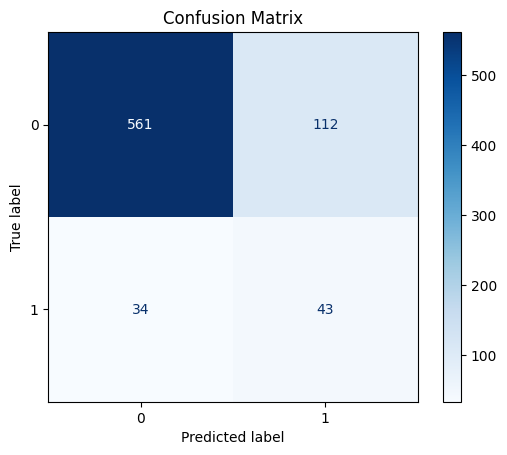

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       673
           1       0.28      0.56      0.37        77

    accuracy                           0.81       750
   macro avg       0.61      0.70      0.63       750
weighted avg       0.87      0.81      0.83       750

Test AUC: 0.7366


In [ ]:
# Predictions
y_pred = clf_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# TEST AUC SCORE
from sklearn.metrics import roc_auc_score
y_prob = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_prob)
print(f"Test AUC: {test_auc:.4f}")

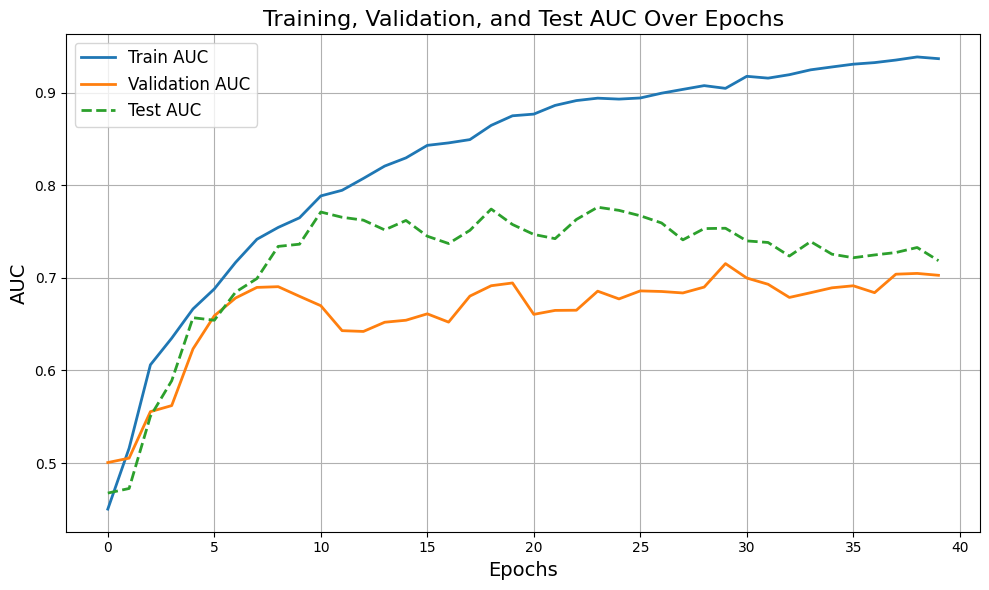

In [ ]:
# PLOT TRAINING, VALIDATION, AND TEST AUC
plt.figure(figsize=(10, 6))
plt.plot(clf_best.history["train_auc"], label="Train AUC", linewidth=2)
plt.plot(clf_best.history["valid_auc"], label="Validation AUC", linewidth=2)
plt.plot(clf_best.history["test_auc"], label="Test AUC", linewidth=2, linestyle='--')

# Plot Settings
plt.title("Training, Validation, and Test AUC Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("AUC", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
##################################################################################

#2)MLP

In [ ]:
data_copy3['HeartConditionBinary'] = ((data_copy3['HadHeartAttack'] == 'Yes') | (data_copy3['HadAngina'] == 'Yes')).astype(int)
data_copy3 = data_copy3.drop(['HadHeartAttack','HadAngina'],axis=1)
data_copy3

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,No,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,North Dakota,Male,Good,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,104.33,31.19,Yes,Yes,Yes,Yes,"Yes, received Tdap",No,Yes,0
4996,New York,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,63.50,24.80,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,0
4997,Washington,Male,Good,30.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,7.0,1 to 5,No,...,157.85,44.68,Yes,No,No,No,"Yes, received Tdap",No,No,0
4998,New York,Female,Very good,3.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,17.23,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes,0


In [ ]:
numerical_cols3 = data_copy3.select_dtypes(include=['float64','number']).columns
categorical_cols3 = data_copy3.select_dtypes(include=['object','category']).columns

In [ ]:
nominal_features = ['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos','RemovedTeeth','SmokerStatus','ECigaretteUsage','HadDiabetes']
binary_features = [
     'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'PhysicalActivities', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan'
]
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'AgeCategory']

data_copy3['Sex'] = data_copy3['Sex'].replace({'Male':1,'Female':0})

<ipython-input-26-a199e0dca117>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy3['Sex'] = data_copy3['Sex'].replace({'Male':1,'Female':0})


In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(data_copy3[nominal_features]),
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=data_copy3.index  # Align indices with the original DataFrame
)

binary_encoded = data_copy3[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)


ordinal_mappings = {
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'LastCheckupTime': [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ],
    'AgeCategory':[
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59','Age 60 to 64', 'Age 65 to 69'
         ,'Age 70 to 74','Age 75 to 79','Age 80 or older'
    ]
}

ordinal_encoded = data_copy3[ordinal_features].replace({
    col: {val: i for i, val in enumerate(vals)} for col, vals in ordinal_mappings.items()
})

<ipython-input-27-5a20a2327230>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_encoded = data_copy3[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-27-5a20a2327230>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordinal_encoded = data_copy3[ordinal_features].replace({


In [ ]:
processed_data1 = pd.concat([nominal_encoded, binary_encoded, ordinal_encoded,numerical_data], axis=1)
processed_data1['HeartConditionBinary'] = data_copy3['HeartConditionBinary'].values
processed_data1

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,6,0.0,0.0,8.0,1.68,113.40,40.35,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,2.0,5.0,8.0,1.73,104.33,34.97,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,7.0,10.0,6.0,1.73,104.33,34.97,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,8,20.0,10.0,8.0,1.68,127.01,45.19,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,49.90,19.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,2,0.0,2.0,6.0,1.83,104.33,31.19,0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,63.50,24.80,0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,6,30.0,0.0,7.0,1.88,157.85,44.68,0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,1,3.0,2.0,7.0,1.70,49.90,17.23,0


In [ ]:
# Check if indices match between the original target and processed data
print(data_copy3['HeartConditionBinary'].index.equals(processed_data1.index))  # Should return True

# Ensure no missing values in the target column
print(processed_data1['HeartConditionBinary'].isnull().sum())

True
0


In [ ]:
!pip install optuna
import torch
import torch.nn as nn
import torch.optim as optim
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
target1 = "HeartConditionBinary"
features1 = [col for col in processed_data1.columns if col != target1]

X1 = processed_data1[features1].values
y1 = processed_data1[target1].values

# Split into train, validation, and test sets (70% train, 15% validation, 15% test)
X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1, y1, test_size=0.3, random_state=10)
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_temp, y1_temp, test_size=0.5, random_state=10)

# Check the shapes of the splits
print(f"Training Data: {X1_train.shape}, Validation Data: {X1_valid.shape}, Test Data: {X1_test.shape}")

Training Data: (3500, 111), Validation Data: (750, 111), Test Data: (750, 111)


In [ ]:
# Standardize numerical data using StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_valid_scaled = scaler.transform(X1_valid)
X1_test_scaled = scaler.transform(X1_test)

# Convert data into PyTorch tensors
X1_train_tensor = torch.tensor(X1_train_scaled, dtype=torch.float32)
y1_train_tensor = torch.tensor(y1_train, dtype=torch.float32).view(-1, 1)

X1_valid_tensor = torch.tensor(X1_valid_scaled, dtype=torch.float32)
y1_valid_tensor = torch.tensor(y1_valid, dtype=torch.float32).view(-1, 1)

X1_test_tensor = torch.tensor(X1_test_scaled, dtype=torch.float32)
y1_test_tensor = torch.tensor(y1_test, dtype=torch.float32).view(-1, 1)

#NO CSL

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Select device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move tensors to the same device
X1_train_tensor = X1_train_tensor.to(device)
y1_train_tensor = y1_train_tensor.to(device)
X1_valid_tensor = X1_valid_tensor.to(device)
y1_valid_tensor = y1_valid_tensor.to(device)
X1_test_tensor = X1_test_tensor.to(device)
y1_test_tensor = y1_test_tensor.to(device)

# Training parameters
num_epochs = 50
learning_rate = 0.001
batch_size = 32

# Results storage
results = []

# Loop for training without class weights
print("\n### Training ANN without class weights")

# Define the model
input_dim = X1_train_tensor.shape[1]
model = ANNModel(input_dim).to(device)  # Move model to the same device

# Define the loss function (without weights)
criterion = nn.BCEWithLogitsLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X1_train_tensor)  # Forward pass
    loss = criterion(outputs, y1_train_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Track loss
    if epoch % 10 == 0 or epoch == num_epochs - 1:
        print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.5f}")

# Evaluate model performance
model.eval()
with torch.no_grad():
    # Predictions
    train_preds = model(X1_train_tensor).cpu().numpy().flatten()
    valid_preds = model(X1_valid_tensor).cpu().numpy().flatten()
    test_preds = model(X1_test_tensor).cpu().numpy().flatten()

    # Convert probabilities to binary (threshold = 0.5)
    train_preds_bin = (train_preds >= 0.5).astype(int)
    valid_preds_bin = (valid_preds >= 0.5).astype(int)
    test_preds_bin = (test_preds >= 0.5).astype(int)

    # Compute AUC
    train_auc = roc_auc_score(y1_train, train_preds)
    valid_auc = roc_auc_score(y1_valid, valid_preds)
    test_auc = roc_auc_score(y1_test, test_preds)

    # Compute Accuracy, Recall, and F1-score
    train_accuracy = accuracy_score(y1_train, train_preds_bin)
    valid_accuracy = accuracy_score(y1_valid, valid_preds_bin)
    test_accuracy = accuracy_score(y1_test, test_preds_bin)

    train_recall = recall_score(y1_train, train_preds_bin, average=None)
    valid_recall = recall_score(y1_valid, valid_preds_bin, average=None)
    test_recall = recall_score(y1_test, test_preds_bin, average=None)

    train_f1 = f1_score(y1_train, train_preds_bin, average=None)
    valid_f1 = f1_score(y1_valid, valid_preds_bin, average=None)
    test_f1 = f1_score(y1_test, test_preds_bin, average=None)

    # Compute confusion matrices
    train_conf_matrix = confusion_matrix(y1_train, train_preds_bin)
    valid_conf_matrix = confusion_matrix(y1_valid, valid_preds_bin)
    test_conf_matrix = confusion_matrix(y1_test, test_preds_bin)

    # Compute classification reports
    train_classification_report = classification_report(y1_train, train_preds_bin)
    valid_classification_report = classification_report(y1_valid, valid_preds_bin)
    test_classification_report = classification_report(y1_test, test_preds_bin)

    # Store results
    results.append({
        "Train AUC": train_auc,
        "Train Accuracy": train_accuracy,
        "Train Recall (0 & 1)": train_recall.tolist(),
        "Train F1-score (0 & 1)": train_f1.tolist(),
        "Train Confusion Matrix": train_conf_matrix.tolist(),
        "Train Classification Report": train_classification_report,

        "Validation AUC": valid_auc,
        "Validation Accuracy": valid_accuracy,
        "Validation Recall (0 & 1)": valid_recall.tolist(),
        "Validation F1-score (0 & 1)": valid_f1.tolist(),
        "Validation Confusion Matrix": valid_conf_matrix.tolist(),
        "Validation Classification Report": valid_classification_report,

        "Test AUC": test_auc,
        "Test Accuracy": test_accuracy,
        "Test Recall (0 & 1)": test_recall.tolist(),
        "Test F1-score (0 & 1)": test_f1.tolist(),
        "Test Confusion Matrix": test_conf_matrix.tolist(),
        "Test Classification Report": test_classification_report,
    })

print("\n🔹 **Train Classification Report**:")
print(train_classification_report)
print("\nTrain Confusion Matrix:\n", train_conf_matrix)

print("\n🔹 **Validation Classification Report**:")
print(valid_classification_report)
print("\nValidation Confusion Matrix:\n", valid_conf_matrix)

print("\n🔹 **Test Classification Report**:")
print(test_classification_report)
print("\nTest Confusion Matrix:\n", test_conf_matrix)


Using device: cuda

### Training ANN without class weights
Epoch 1/50 | Loss: 0.94371
Epoch 11/50 | Loss: 0.90269
Epoch 21/50 | Loss: 0.86994
Epoch 31/50 | Loss: 0.82983
Epoch 41/50 | Loss: 0.78236
Epoch 50/50 | Loss: 0.74430

🔹 **Train Classification Report**:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3185
           1       0.00      0.00      0.00       315

    accuracy                           0.91      3500
   macro avg       0.46      0.50      0.48      3500
weighted avg       0.83      0.91      0.87      3500


Train Confusion Matrix:
 [[3185    0]
 [ 315    0]]

🔹 **Validation Classification Report**:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       697
           1       0.00      0.00      0.00        53

    accuracy                           0.93       750
   macro avg       0.46      0.50      0.48       750
weighted avg       0.86      0.93      0.90  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
train_auc = roc_auc_score(y1_train, train_preds)
valid_auc = roc_auc_score(y1_valid, valid_preds)
test_auc = roc_auc_score(y1_test, test_preds)


print("\n🔹 **Train AUC ROC**: ", train_auc)
print("\n🔹 **Validation AUC ROC**: ", valid_auc)
print("\n🔹 **Test AUC ROC**: ", test_auc)


🔹 **Train AUC ROC**:  0.7438478981336125

🔹 **Validation AUC ROC**:  0.7208250994829593

🔹 **Test AUC ROC**:  0.7702861774184211


#CSL

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score, accuracy_score

# Custom BCE Loss that applies different weights for class 0 and class 1
class WeightedBCELoss(nn.Module):
    def __init__(self, weight_dict):
        super(WeightedBCELoss, self).__init__()
        self.weight_0 = torch.tensor(weight_dict[0], dtype=torch.float32)
        self.weight_1 = torch.tensor(weight_dict[1], dtype=torch.float32)
        self.bce_loss = nn.BCEWithLogitsLoss(reduction='none')  # Compute per-sample loss

    def forward(self, logits, targets):
        loss = self.bce_loss(logits, targets)  # Compute BCE loss for each sample
        weights = torch.where(targets == 1, self.weight_1, self.weight_0)  # Assign class-specific weights
        return (loss * weights).mean()  # Return weighted mean loss

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Select device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move tensors to the same device
X1_train_tensor = X1_train_tensor.to(device)
y1_train_tensor = y1_train_tensor.to(device)
X1_valid_tensor = X1_valid_tensor.to(device)
y1_valid_tensor = y1_valid_tensor.to(device)
X1_test_tensor = X1_test_tensor.to(device)
y1_test_tensor = y1_test_tensor.to(device)

# Define different weight sets
weight_options = [
    {0: 1, 1: 10.24},  # IR
    {0: (1 / 10.24), 1: 1},  # I/IR Custom
    {0: 0.009686677935912087, 1: 0.9903133220640878},  # ICF
    {0: 0.037690255940969176, 1: 0.9623097440590308}  # LICF
]

weight_labels = ["IR", "I/IR Custom", "ICF", "LICF"]  # Labels for easier interpretation

# Training parameters
num_epochs = 50
learning_rate = 0.001
batch_size = 32

# Results storage
results = []

# Loop through each weight set
for i, class_weights in enumerate(weight_options):
    weight_label = weight_labels[i]  # Get the label for this weight set
    print(f"\n### Training ANN with Weight Set: {weight_label} (Class 0: {class_weights[0]}, Class 1: {class_weights[1]})")

    # Define the model
    input_dim = X1_train_tensor.shape[1]
    model = ANNModel(input_dim).to(device)  # Move model to the same device

    # Define loss function with different weights for class 0 and class 1
    criterion = WeightedBCELoss(class_weights).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training Loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X1_train_tensor)  # Forward pass
        loss = criterion(outputs, y1_train_tensor)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Track loss
        if epoch % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.5f}")

    # Evaluate model performance
    model.eval()
    with torch.no_grad():
        # Predictions
        train_preds = model(X1_train_tensor).cpu().numpy().flatten()
        valid_preds = model(X1_valid_tensor).cpu().numpy().flatten()
        test_preds = model(X1_test_tensor).cpu().numpy().flatten()

        # Convert probabilities to binary (threshold = 0.5)
        train_preds_bin = (train_preds >= 0.5).astype(int)
        valid_preds_bin = (valid_preds >= 0.5).astype(int)
        test_preds_bin = (test_preds >= 0.5).astype(int)

        # Compute AUC
        train_auc = roc_auc_score(y1_train, train_preds)
        valid_auc = roc_auc_score(y1_valid, valid_preds)
        test_auc = roc_auc_score(y1_test, test_preds)

        # Print AUC ROC values
        print(f"\n🔹 **Train AUC ROC**: {train_auc:.5f}")
        print(f"🔹 **Validation AUC ROC**: {valid_auc:.5f}")
        print(f"🔹 **Test AUC ROC**: {test_auc:.5f}")

        # Compute Accuracy, Recall, and F1-score
        train_accuracy = accuracy_score(y1_train, train_preds_bin)
        valid_accuracy = accuracy_score(y1_valid, valid_preds_bin)
        test_accuracy = accuracy_score(y1_test, test_preds_bin)

        train_recall = recall_score(y1_train, train_preds_bin, average=None)
        valid_recall = recall_score(y1_valid, valid_preds_bin, average=None)
        test_recall = recall_score(y1_test, test_preds_bin, average=None)

        train_f1 = f1_score(y1_train, train_preds_bin, average=None)
        valid_f1 = f1_score(y1_valid, valid_preds_bin, average=None)
        test_f1 = f1_score(y1_test, test_preds_bin, average=None)

        # Compute confusion matrices
        train_conf_matrix = confusion_matrix(y1_train, train_preds_bin)
        valid_conf_matrix = confusion_matrix(y1_valid, valid_preds_bin)
        test_conf_matrix = confusion_matrix(y1_test, test_preds_bin)

        # Compute classification reports
        train_classification_report = classification_report(y1_train, train_preds_bin)
        valid_classification_report = classification_report(y1_valid, valid_preds_bin)
        test_classification_report = classification_report(y1_test, test_preds_bin)

        # Store results
        results.append({
            "Weight Set": weight_label,
            "Train AUC": train_auc,
            "Train Accuracy": train_accuracy,
            "Train Recall (0 & 1)": train_recall.tolist(),
            "Train F1-score (0 & 1)": train_f1.tolist(),
            "Train Confusion Matrix": train_conf_matrix.tolist(),
            "Train Classification Report": train_classification_report,

            "Validation AUC": valid_auc,
            "Validation Accuracy": valid_accuracy,
            "Validation Recall (0 & 1)": valid_recall.tolist(),
            "Validation F1-score (0 & 1)": valid_f1.tolist(),
            "Validation Confusion Matrix": valid_conf_matrix.tolist(),
            "Validation Classification Report": valid_classification_report,

            "Test AUC": test_auc,
            "Test Accuracy": test_accuracy,
            "Test Recall (0 & 1)": test_recall.tolist(),
            "Test F1-score (0 & 1)": test_f1.tolist(),
            "Test Confusion Matrix": test_conf_matrix.tolist(),
            "Test Classification Report": test_classification_report,
        })

    print("\n🔹 **Train Classification Report**:")
    print(train_classification_report)
    print("\nTrain Confusion Matrix:\n", train_conf_matrix)

    print("\n🔹 **Validation Classification Report**:")
    print(valid_classification_report)
    print("\nValidation Confusion Matrix:\n", valid_conf_matrix)

    print("\n🔹 **Test Classification Report**:")
    print(test_classification_report)
    print("\nTest Confusion Matrix:\n", test_conf_matrix)



Using device: cuda

### Training ANN with Weight Set: IR (Class 0: 1, Class 1: 10.24)
Epoch 1/50 | Loss: 1.33009
Epoch 11/50 | Loss: 1.30186
Epoch 21/50 | Loss: 1.26152
Epoch 31/50 | Loss: 1.21212
Epoch 41/50 | Loss: 1.17114
Epoch 50/50 | Loss: 1.14360

🔹 **Train AUC ROC**: 0.86379
🔹 **Validation AUC ROC**: 0.80136
🔹 **Test AUC ROC**: 0.80701

🔹 **Train Classification Report**:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3185
           1       0.34      0.63      0.44       315

    accuracy                           0.86      3500
   macro avg       0.65      0.76      0.68      3500
weighted avg       0.90      0.86      0.87      3500


Train Confusion Matrix:
 [[2798  387]
 [ 115  200]]

🔹 **Validation Classification Report**:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       697
           1       0.23      0.51      0.31        53

    accuracy                      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


🔹 **Train Classification Report**:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3185
           1       0.09      1.00      0.17       315

    accuracy                           0.09      3500
   macro avg       0.04      0.50      0.08      3500
weighted avg       0.01      0.09      0.01      3500


Train Confusion Matrix:
 [[   0 3185]
 [   0  315]]

🔹 **Validation Classification Report**:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       697
           1       0.07      1.00      0.13        53

    accuracy                           0.07       750
   macro avg       0.04      0.50      0.07       750
weighted avg       0.00      0.07      0.01       750


Validation Confusion Matrix:
 [[  0 697]
 [  0  53]]

🔹 **Test Classification Report**:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       673
           1      

In [ ]:
df_results = pd.DataFrame(results)
print("\n### 📊 Final ANN Model Comparison ###")
print(df_results)



### 📊 Final ANN Model Comparison ###
    Weight Set  Train AUC  Train Accuracy  \
0           IR   0.868556        0.844857   
1  I/IR Custom   0.865557        0.815143   
2          ICF   0.848278        0.090000   
3         LICF   0.861264        0.609714   

                       Train Recall (0 & 1)  \
0   [0.8599686028257457, 0.692063492063492]   
1  [0.8251177394034537, 0.7142857142857143]   
2                                [0.0, 1.0]   
3  [0.5751962323390895, 0.9587301587301588]   

                      Train F1-score (0 & 1)     Train Confusion Matrix  \
0   [0.9098156452416543, 0.4453524004085802]   [[2739, 446], [97, 218]]   
1  [0.8903947145519228, 0.41020966271649956]   [[2628, 557], [90, 225]]   
2                  [0.0, 0.1651376146788991]      [[0, 3185], [0, 315]]   
3   [0.7284294234592446, 0.3065989847715736]  [[1832, 1353], [13, 302]]   

                         Train Classification Report  Validation AUC  \
0                precision    recall  f1-score   ...

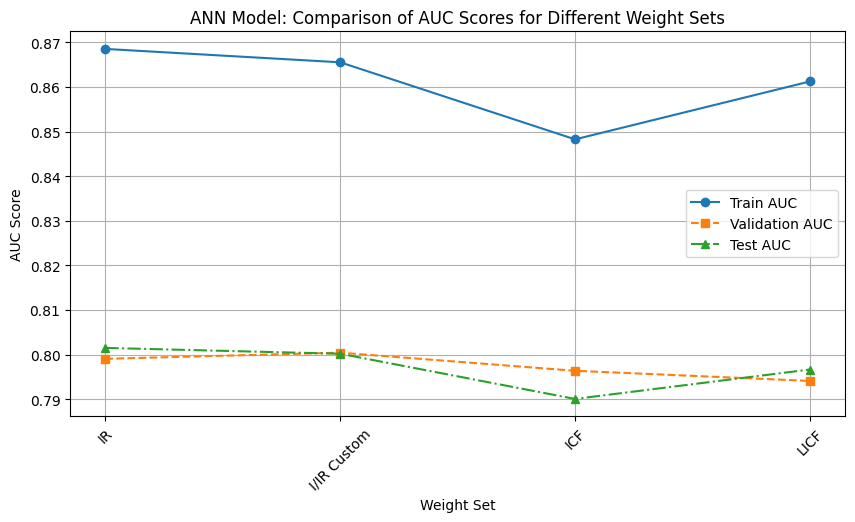

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_results["Weight Set"], df_results["Train AUC"], marker='o', linestyle='-', label="Train AUC")
plt.plot(df_results["Weight Set"], df_results["Validation AUC"], marker='s', linestyle='--', label="Validation AUC")
plt.plot(df_results["Weight Set"], df_results["Test AUC"], marker='^', linestyle='-.', label="Test AUC")
plt.xlabel("Weight Set")
plt.ylabel("AUC Score")
plt.title("ANN Model: Comparison of AUC Scores for Different Weight Sets")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
########################################################

In [ ]:
def objective(trial):
    # Suggest hyperparameters to tune
    hidden_size1 = trial.suggest_int("hidden_size1", 64, 256)
    hidden_size2 = trial.suggest_int("hidden_size2", 32, 128)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)

    # Define the MLP model
    model = nn.Sequential(
        nn.Linear(X1_train_tensor.shape[1], hidden_size1),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_size1, hidden_size2),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_size2, 1),
        nn.Sigmoid()
    )

    # Loss function and optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.BCELoss()

    # Training loop for hyperparameter tuning
    for epoch in range(50):
        model.train()
        optimizer.zero_grad()
        output = model(X1_train_tensor)
        loss = criterion(output, y1_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate on the validation set
    model.eval()
    with torch.no_grad():
        y_pred_valid = model(X1_valid_tensor).numpy()
        auc = roc_auc_score(y1_valid_tensor.numpy(), y_pred_valid)

    return auc  # Return the AUC score for validation

In [ ]:
# Initialize the Optuna study and maximize AUC
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)

# Display best hyperparameters
print("Best Parameters:", study.best_params)
print("Best Validation AUC:", study.best_value)

[I 2025-01-22 17:23:31,637] A new study created in memory with name: no-name-00cc3d70-d34b-425a-8286-3c7c6da4c7ef
[I 2025-01-22 17:23:35,674] Trial 0 finished with value: 0.8050946103245716 and parameters: {'hidden_size1': 250, 'hidden_size2': 93, 'lr': 0.000526130398247149, 'dropout': 0.36787852298259627, 'weight_decay': 0.00019370176817692103}. Best is trial 0 with value: 0.8050946103245716.
[I 2025-01-22 17:23:37,080] Trial 1 finished with value: 0.809317560434206 and parameters: {'hidden_size1': 161, 'hidden_size2': 107, 'lr': 0.002712800069525784, 'dropout': 0.43973325122231877, 'weight_decay': 4.450075713859684e-06}. Best is trial 1 with value: 0.809317560434206.
[I 2025-01-22 17:23:37,972] Trial 2 finished with value: 0.8127554749465364 and parameters: {'hidden_size1': 140, 'hidden_size2': 44, 'lr': 0.0034076163099372616, 'dropout': 0.4603159858865621, 'weight_decay': 3.4142996559905006e-06}. Best is trial 2 with value: 0.8127554749465364.
[I 2025-01-22 17:23:38,548] Trial 3 fin

Best Parameters: {'hidden_size1': 233, 'hidden_size2': 121, 'lr': 0.0012960913038342567, 'dropout': 0.253397621605684, 'weight_decay': 2.8546745410441785e-06}
Best Validation AUC: 0.8197666549362498


In [ ]:
best_params = study.best_params

# Defining the final MLP model with best hyperparameters
final_model = nn.Sequential(
    nn.Linear(X1_train_tensor.shape[1], best_params["hidden_size1"]),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(best_params["hidden_size1"], best_params["hidden_size2"]),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(best_params["hidden_size2"], 1),
    nn.Sigmoid()
)

optimizer = optim.Adam(final_model.parameters(), lr=best_params["lr"], weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

In [ ]:
# Early stopping and class imbalance handling
patience = 30  # Increased patience
best_valid_auc = 0
epochs_no_improve = 0

# Calculate class weights for imbalance handling
pos_weight = torch.tensor([10.24], dtype=torch.float32)  # Adjust the positive weight based on IR

# Updated loss function with class weights
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Training loop
# Initialize lists to store the accuracies
train_accuracies = []
valid_accuracies = []
test_accuracies = []
train_auc_scores = []
valid_auc_scores = []
test_auc_scores = []

# Training loop with metrics for train, validation, and test sets
for epoch in range(100):
    final_model.train()
    optimizer.zero_grad()
    output_train = final_model(X1_train_tensor).flatten()

    # Compute training loss
    loss = criterion(output_train, y1_train_tensor.flatten())
    loss.backward()
    optimizer.step()

    # Calculate train accuracy and AUC
    y1_pred_train_binary = (torch.sigmoid(output_train) > 0.5).cpu().numpy().astype(int)
    train_accuracy = accuracy_score(y1_train_tensor.numpy(), y1_pred_train_binary)
    train_auc = roc_auc_score(y1_train_tensor.numpy(), torch.sigmoid(output_train).detach().numpy())

    # Validation
    final_model.eval()
    with torch.no_grad():
        y1_pred_valid_final = final_model(X1_valid_tensor).flatten()
        y1_pred_valid_binary = (torch.sigmoid(y1_pred_valid_final) > 0.5).cpu().numpy().astype(int)
        valid_accuracy = accuracy_score(y1_valid_tensor.numpy(), y1_pred_valid_binary)
        valid_auc = roc_auc_score(y1_valid_tensor.numpy(), torch.sigmoid(y1_pred_valid_final).detach().numpy())

    # Test
    with torch.no_grad():
        y1_pred_test_final = final_model(X1_test_tensor).flatten()
        y1_pred_test_binary = (torch.sigmoid(y1_pred_test_final) > 0.5).cpu().numpy().astype(int)
        test_accuracy = accuracy_score(y1_test_tensor.numpy(), y1_pred_test_binary)
        test_auc = roc_auc_score(y1_test_tensor.numpy(), torch.sigmoid(y1_pred_test_final).detach().numpy())

    # Store metrics for plotting
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    test_accuracies.append(test_accuracy)
    train_auc_scores.append(train_auc)
    valid_auc_scores.append(valid_auc)
    test_auc_scores.append(test_auc)

    # Early stopping based on validation AUC
    if valid_auc > best_valid_auc:
        best_valid_auc = valid_auc
        epochs_no_improve = 0
        best_model_weights = final_model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch} with best validation AUC: {best_valid_auc:.4f}")
            break

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Train AUC: {train_auc:.4f}, Valid AUC: {valid_auc:.4f}")

Epoch 1, Loss: 1.0472, Train AUC: 0.8850, Valid AUC: 0.7795
Epoch 2, Loss: 1.0448, Train AUC: 0.8914, Valid AUC: 0.7789
Epoch 3, Loss: 1.0416, Train AUC: 0.8932, Valid AUC: 0.7785
Epoch 4, Loss: 1.0412, Train AUC: 0.8922, Valid AUC: 0.7776
Epoch 5, Loss: 1.0370, Train AUC: 0.8984, Valid AUC: 0.7774
Epoch 6, Loss: 1.0386, Train AUC: 0.8964, Valid AUC: 0.7766
Epoch 7, Loss: 1.0351, Train AUC: 0.8918, Valid AUC: 0.7774
Epoch 8, Loss: 1.0346, Train AUC: 0.8946, Valid AUC: 0.7768
Epoch 9, Loss: 1.0325, Train AUC: 0.8969, Valid AUC: 0.7764
Epoch 10, Loss: 1.0312, Train AUC: 0.8990, Valid AUC: 0.7766
Epoch 11, Loss: 1.0287, Train AUC: 0.8976, Valid AUC: 0.7755
Epoch 12, Loss: 1.0290, Train AUC: 0.8998, Valid AUC: 0.7754
Epoch 13, Loss: 1.0269, Train AUC: 0.9000, Valid AUC: 0.7756
Epoch 14, Loss: 1.0259, Train AUC: 0.8992, Valid AUC: 0.7757
Epoch 15, Loss: 1.0255, Train AUC: 0.9013, Valid AUC: 0.7767
Epoch 16, Loss: 1.0240, Train AUC: 0.9012, Valid AUC: 0.7778
Epoch 17, Loss: 1.0193, Train AUC

In [ ]:
# Load the best model weights after training
final_model.load_state_dict(best_model_weights)

# Final evaluation on the test set
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test AUC: {test_auc:.4f}")
print("Final Classification Report (Test Set):\n", classification_report(y1_test_tensor.numpy(), y1_pred_test_binary))
print("Final Confusion Matrix (Test Set):\n", confusion_matrix(y1_test_tensor.numpy(), y1_pred_test_binary))


Final Test Accuracy: 0.4640
Final Test AUC: 0.7801
Final Classification Report (Test Set):
               precision    recall  f1-score   support

         0.0       0.97      0.41      0.58       673
         1.0       0.15      0.90      0.26        77

    accuracy                           0.46       750
   macro avg       0.56      0.66      0.42       750
weighted avg       0.89      0.46      0.55       750

Final Confusion Matrix (Test Set):
 [[279 394]
 [  8  69]]


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Step 1: Make a copy of the dataset
balanced_data = processed_data.copy()
balanced_data

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,6,0.0,0.0,8.0,1.68,113.40,40.35,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,2.0,5.0,8.0,1.73,104.33,34.97,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,7.0,10.0,6.0,1.73,104.33,34.97,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,8,20.0,10.0,8.0,1.68,127.01,45.19,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,49.90,19.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,2,0.0,2.0,6.0,1.83,104.33,31.19,0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,63.50,24.80,0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,6,30.0,0.0,7.0,1.88,157.85,44.68,0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,1,3.0,2.0,7.0,1.70,49.90,17.23,0


In [ ]:
numerical_cols3 = balanced_data.select_dtypes(include=['float64','number']).columns
numerical_data3 = balanced_data[numerical_cols]
numerical_data3

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,1.68,113.40,40.35
1,2.0,5.0,8.0,1.73,104.33,34.97
2,7.0,10.0,6.0,1.73,104.33,34.97
3,20.0,10.0,8.0,1.68,127.01,45.19
4,0.0,0.0,7.0,1.60,49.90,19.49
...,...,...,...,...,...,...
4995,0.0,2.0,6.0,1.83,104.33,31.19
4996,0.0,0.0,7.0,1.60,63.50,24.80
4997,30.0,0.0,7.0,1.88,157.85,44.68
4998,3.0,2.0,7.0,1.70,49.90,17.23


In [ ]:
class_counts2 = balanced_data ['HeartConditionBinary'].value_counts()
class_counts2

,count
HeartConditionBinary,
0,4555
1,445


In [ ]:
Xb = processed_data.drop(columns=["HeartConditionBinary"])  # Features
yb = processed_data["HeartConditionBinary"]                # Target

# Step 2: Split data into training and testing sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=10, stratify=yb)

In [ ]:
scaler2 = StandardScaler()

# Fit on training data and transform both train and test sets
Xb_train[numerical_cols] = scaler2.fit_transform(Xb_train[numerical_cols])
Xb_test[numerical_cols] = scaler2.transform(Xb_test[numerical_cols])

In [ ]:
Xb_train

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,ChestScan,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,3,10,0.334637,-0.518356,1.428237,-1.223946,-0.081368,0.628928
3725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,3,5,-0.020510,-0.157907,-0.737946,-1.223946,-1.134175,-0.748206
2840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,3,6,-0.494039,0.082393,-0.737946,-0.474596,-0.292115,-0.068679
1146,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,2,3,9,2.110373,0.442842,-0.015885,-0.193590,-1.176417,-1.218300
794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,3,11,-0.494039,-0.518356,0.706176,-0.661934,-0.081368,0.324572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,3,12,0.097873,-0.518356,0.706176,-0.006252,0.465925,0.529485
2983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,7,-0.257275,-0.278056,-0.737946,-0.193590,0.318309,0.508391
3425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,0,0,-0.494039,-0.518356,-1.460007,1.211441,-0.502862,-1.061602
3928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,3,10,2.465520,-0.518356,0.706176,1.960791,1.076349,0.094046


In [ ]:
Xb_train.columns = Xb_train.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
Xb_test.columns = Xb_test.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)

In [ ]:
# Step 3: Apply SMOTE to the training set
smote = SMOTE(random_state=42)
Xb_train_smote, yb_train_smote = smote.fit_resample(Xb_train, yb_train)


In [ ]:
# Step 4: Check the class distribution after SMOTE
print("Class distribution before SMOTE:", Counter(yb_train))
print("Class distribution after SMOTE:", Counter(yb_train_smote))

Class distribution before SMOTE: Counter({0: 3644, 1: 356})
Class distribution after SMOTE: Counter({0: 3644, 1: 3644})


In [ ]:
'''Xb_test_scaled_df = pd.DataFrame(Xb_test_scaled, columns=Xb_test.columns)
Xb_train_scaled_df = pd.DataFrame(Xb_train_scaled, columns=Xb_train.columns)'''

In [ ]:
modelsb = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10),
    "LightGBM": LGBMClassifier(random_state=10),
    "Naive Bayes": GaussianNB()
}

Training Logistic Regression...

Logistic Regression - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       911
           1       0.17      0.40      0.24        89

    accuracy                           0.77      1000
   macro avg       0.55      0.61      0.55      1000
weighted avg       0.86      0.77      0.81      1000


Logistic Regression - Confusion Matrix (Test Set):


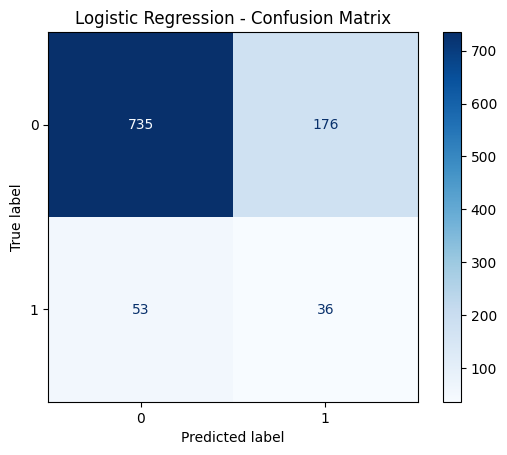

Training Random Forest...

Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       911
           1       0.21      0.04      0.07        89

    accuracy                           0.90      1000
   macro avg       0.56      0.51      0.51      1000
weighted avg       0.85      0.90      0.87      1000


Random Forest - Confusion Matrix (Test Set):


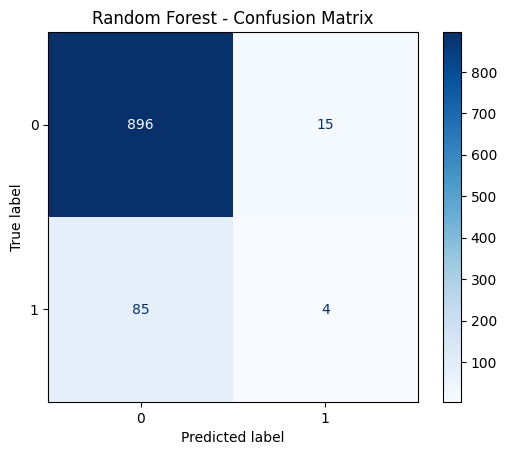

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:29:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       911
           1       0.28      0.11      0.16        89

    accuracy                           0.90      1000
   macro avg       0.60      0.54      0.55      1000
weighted avg       0.86      0.90      0.87      1000


XGBoost - Confusion Matrix (Test Set):


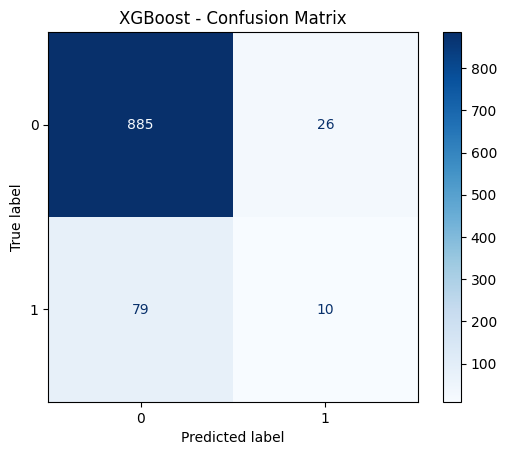

Training LightGBM...
[LightGBM] [Info] Number of positive: 3644, number of negative: 3644
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9329
[LightGBM] [Info] Number of data points in the train set: 7288, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       911
           1       0.35      0.10      0.16        89

    accuracy                           0.90      1000
   macro avg       0.63      0.54      0.55      1000
weighted avg       0.87      0.90      0.88      1000


LightGBM - Confusion Matrix (Test Set):


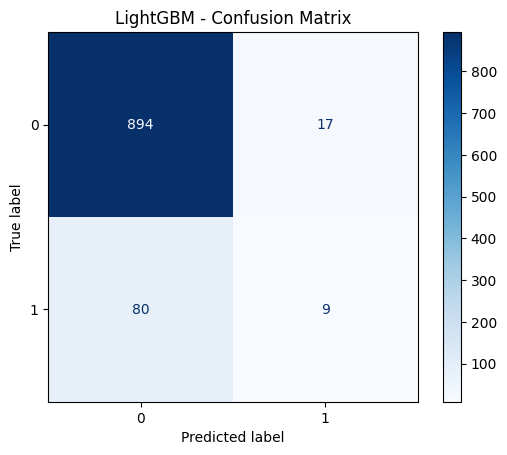

Training Naive Bayes...

Naive Bayes - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.39      0.55       911
           1       0.10      0.73      0.18        89

    accuracy                           0.42      1000
   macro avg       0.52      0.56      0.37      1000
weighted avg       0.86      0.42      0.52      1000


Naive Bayes - Confusion Matrix (Test Set):


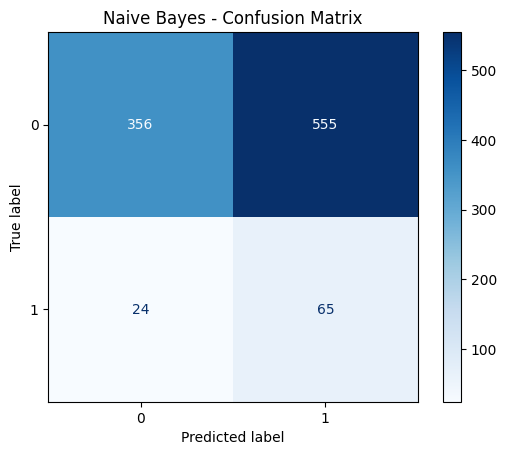


Model Performance Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.849204          0.771  0.689574   
1        Random Forest        1.000000          0.900  0.747888   
2              XGBoost        0.995198          0.895  0.753981   
3             LightGBM        0.989572          0.903  0.766253   
4          Naive Bayes        0.673024          0.421  0.597991   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.865215            0.239203          0.806806          0.404494  
1            0.947146            0.074074          0.983535          0.044944  
2            0.944000            0.160000          0.971460          0.112360  
3            0.948541            0.156522          0.981339          0.101124  
4            0.551510            0.183357          0.390779          0.730337  


<Figure size 1000x600 with 0 Axes>

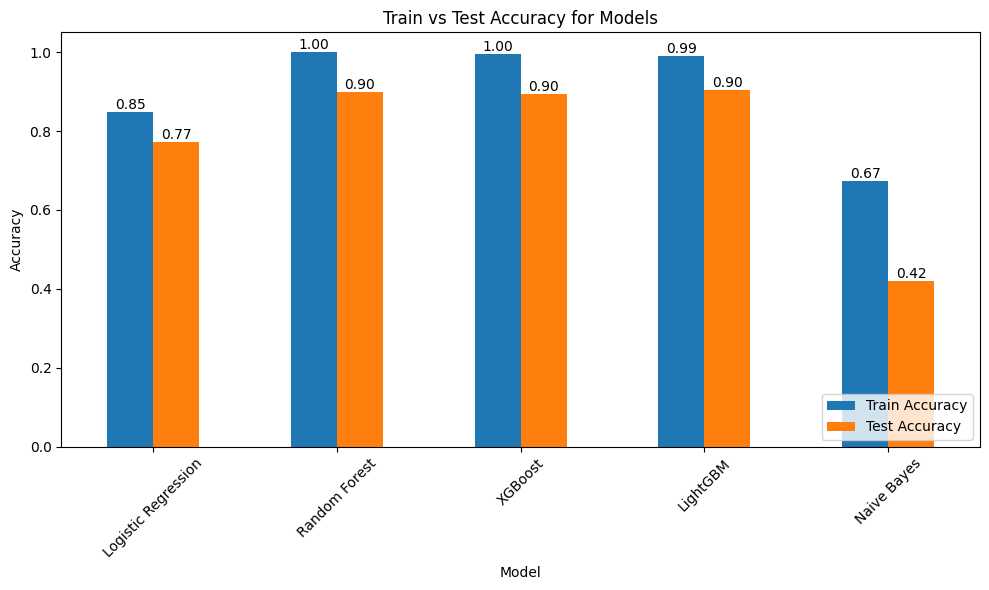

In [ ]:
results = []

# Train and evaluate each model
for name, model in modelsb.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(Xb_train_smote, yb_train_smote)

    # Predictions
    yb_train_pred = model.predict(Xb_train_smote)
    yb_test_pred = model.predict(Xb_test)

    # Accuracy
    train_accuracy = accuracy_score(yb_train_smote, yb_train_pred)
    test_accuracy = accuracy_score(yb_test, yb_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(yb_test)) == 2:  # Check if binary classification
        yb_test_prob = model.predict_proba(Xb_test)[:, 1] if hasattr(model, 'predict_proba') else None
        if yb_test_prob is not None:
            auc_roc = roc_auc_score(yb_test, yb_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        yb_test, yb_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print classification report
    print(f"\n{name} - Classification Report (Test Set):")
    print(classification_report(yb_test, yb_test_pred))

    # Confusion matrix
    cm = confusion_matrix(yb_test, yb_test_pred)
    print(f"\n{name} - Confusion Matrix (Test Set):")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()